# House Prices Regression

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# 경고문 미표시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터프레임 표시 제한 설정
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Load Data

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
data = housing['frame']
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg   'Wd Sdng'   'Wd Shng'       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
print(housing['DESCR']) # Description : 변수 설명

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

## 데이터 미리보기

In [5]:
# 데이터프레임 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# 중복된 데이터 확인
data.duplicated().sum()

np.int64(0)

In [7]:
# 결측치 확인
data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageFinish       81
GarageQual         81
GarageYrBlt        81
GarageType         81
GarageCond         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtFinType1       37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodA

# 단순 선형 회귀 (Simple Linear Regression)

In [8]:
# OverallQual, GrLivArea, GarageCars 변수 선택
features = ['GrLivArea']
target = 'SalePrice'

X = data[features]
y = data[target]

X.shape, y.shape

((1460, 1), (1460,))

In [9]:
# 결측치 확인
X.isnull().sum()

GrLivArea    0
dtype: int64

In [10]:
# Features 데이터 확인
X.head()

GrLivArea
0       1710
1       1262
2       1786
3       1717
4       2198

In [11]:
# Target 데이터 확인
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

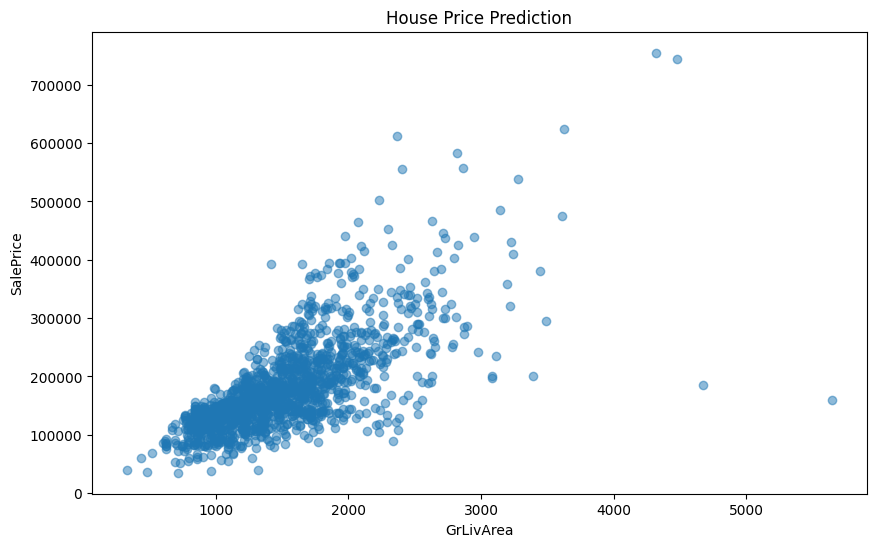

In [12]:
# matplotlib scatter를 이용한 산점도
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('House Price Prediction')
plt.show()

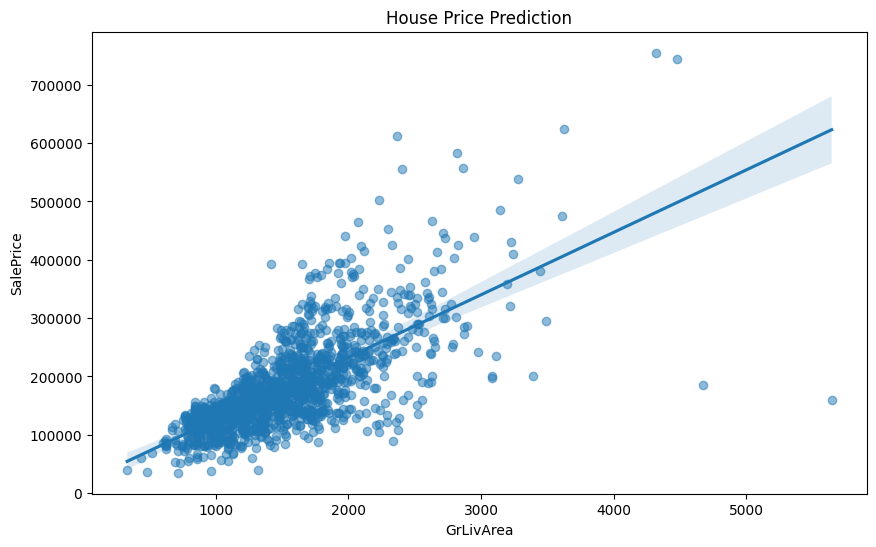

In [13]:
# seaborn의 regplot을 이용한 산점도
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, scatter_kws={'alpha':0.5})
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('House Price Prediction')
plt.show()

In [14]:
# Train 데이터 80% (Train 데이터 60% Validation 데이터 20%) / Test 데이터 20%
# 검증 데이터와 테스트 데이터의 분포가 비슷한 것을 찾자. 쉽진 않다 .. (train_test_split 이 잘 된 것이다 !)

In [15]:
X

GrLivArea
0          1710
1          1262
2          1786
3          1717
4          2198
...         ...
1455       1647
1456       2073
1457       2340
1458       1078
1459       1256

[1460 rows x 1 columns]

In [16]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [17]:
# Train - Test 분할 (Hold-out Validation)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 
# random_state 값 설정 :train_test_split 을 여러 번 실행해도 결과값은 항상 일정하다.
# test_size= 실수 : test_size의 비율 / test_size= 정수 : test_size 의 개수 설정
print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(1168, 1) (1168,)
(292, 1) (292,)


In [18]:
X_tr.head()

GrLivArea
254        1314
1066       1571
638         796
799        1768
380        1691

In [19]:
# 기본 선형회귀
from sklearn.linear_model import LinearRegression

# 기본적인 최소제곱법(OLS) 사용
lr_model = LinearRegression()
lr_model.fit(X_tr, y_tr)

LinearRegression()

In [20]:
# 평균
y_tr.mean()

np.float64(181441.5419520548)

In [21]:
# 계수(기울기)
lr_model.coef_

array([102.48895892])

In [22]:
# 상수(절편)
lr_model.intercept_

np.float64(24899.74815733818)

In [23]:
# SalePrice =  24899 + 102.4889 * GrLivArea
# 모델로 설명을 못하는 부분이 상수부분 , y_tr.mean() 이 180,000 인데 절편이 25,000 이니 아직 정확성이 떨어진다.
# 따라서 다른 독립변수를 추가해서 절편을 최소화하는게 모델을 정교하게 만드는 것이다.

In [24]:
lr_model.predict(X_val)

array([134357.9562804 , 293625.79843699, 130258.39792373, 195441.37579477,
       190931.86160243,  89467.79227487, 225163.17388062, 174123.67234009,
        89467.79227487, 167666.86792833, 176275.94047734, 114475.09825055,
       116524.87742889, 182220.30009451, 198106.0887266 , 128208.6187454 ,
       201180.7574941 , 141122.2275689 , 128618.57458106, 176480.91839517,
       209687.34108419, 187857.19283493, 176173.45151842, 120829.41370339,
       171561.44836717, 147784.00989849, 162234.95310575, 113450.20866139,
       189292.03825976, 163464.82061275, 153215.92472108, 234592.15810095,
       341180.67537435, 122469.23704606, 192571.6849451 , 141327.20548674,
       220038.72593478, 222498.46094878, 283171.92462748, 115295.00992189,
       145426.7638434 , 241151.45147162, 122264.25912823, 234182.20226529,
       126158.83956706, 251400.3473633 , 118369.67868939, 122776.70392281,
       260214.39783013, 181092.92154642, 126158.83956706, 185499.94677984,
       158545.35058475, 3

In [25]:
# 성능 평가 (R^2 결정계수)
print(f"훈련 셋: {lr_model.score(X_tr, y_tr)}")
print(f"검증 셋: {lr_model.score(X_val, y_val)}")

훈련 셋: 0.483931586143035
검증 셋: 0.5542632452871117


In [26]:
# 성능 평가 (MSE) (오차의 제곱의 합의 평균)
from sklearn.metrics import mean_squared_error
print(f"훈련 셋: {mean_squared_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_squared_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 3078116053.85812
검증 셋: 3418946311.180807


In [27]:
# 성능 평가 (MAE) (오차의 절대값의 합의 평균)
from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_absolute_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 37328.73928647853
검증 셋: 38341.204476421066


In [28]:
# 성능 평가 (RMSE) (오차의 절대값의 합의 평균의 제곱근) (MSE 의 제곱근)

# 다중 선형 회귀 (Multiple Linear Regression)

In [29]:
# OverallQual, GrLivArea, GarageCars 변수 선택
features = ['OverallQual', 'GrLivArea', 'GarageCars']
target = 'SalePrice'

X = data[features]
y = data[target]

X.shape, y.shape

((1460, 3), (1460,))

In [30]:
# 결측치 확인
X.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
dtype: int64

In [31]:
# Features 데이터 확인
X.head()

OverallQual  GrLivArea  GarageCars
0            7       1710           2
1            6       1262           2
2            7       1786           2
3            7       1717           3
4            8       2198           3

In [32]:
# Target 데이터 확인
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [33]:
# 변수 간의 상관계수
pd.concat([X, y], axis=1).corr()

OverallQual  GrLivArea  GarageCars  SalePrice
OverallQual     1.000000   0.593007    0.600671   0.790982
GrLivArea       0.593007   1.000000    0.467247   0.708624
GarageCars      0.600671   0.467247    1.000000   0.640409
SalePrice       0.790982   0.708624    0.640409   1.000000

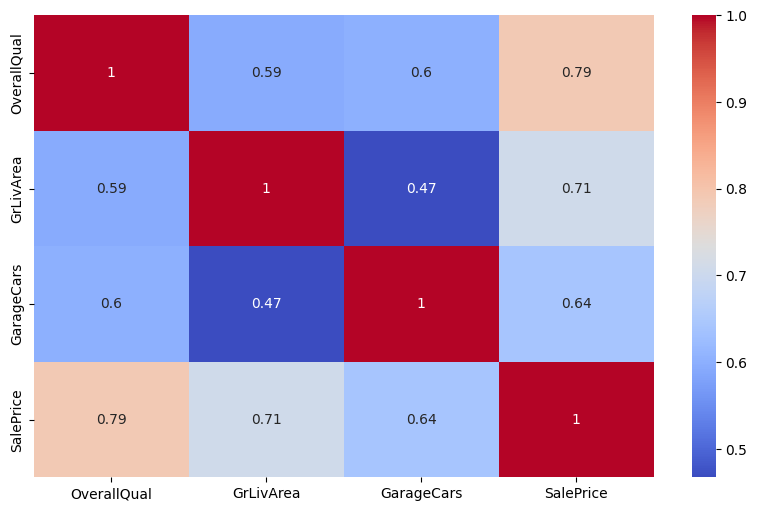

In [34]:
# Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

In [35]:
# Train - Test 분할 (Hold-out Validation)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(1168, 3) (1168,)
(292, 3) (292,)


In [36]:
# 기본 선형회귀
from sklearn.linear_model import LinearRegression

# 기본적인 최소제곱법(OLS) 사용
lr_model = LinearRegression()
lr_model.fit(X_tr, y_tr)

LinearRegression()

In [37]:
# 계수
lr_model.coef_

array([26772.48983385,    47.2285051 , 22239.45989805])

In [38]:
# 상수(절편)
lr_model.intercept_

# 양의 상관관계를 가지는 변수들만 대입해서 절편이 큰 음수, 음의 상관관계를 가지는 변수들을 추가로 고려하면 향상될 수 있다.

np.float64(-94208.72140326074)

In [39]:
# 성능 평가 (R^2 결정계수)
print(f"훈련 셋: {lr_model.score(X_tr, y_tr)}")
print(f"검증 셋: {lr_model.score(X_val, y_val)}")

훈련 셋: 0.7318323626548342
검증 셋: 0.7585805446926186


In [40]:
# 성능 평가 (MSE)
from sklearn.metrics import mean_squared_error
print(f"훈련 셋: {mean_squared_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_squared_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 1599499383.1692665
검증 셋: 1851765974.969048


In [41]:
# 성능 평가 (MAE)
from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_absolute_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 27161.035279273263
검증 셋: 28121.524151747955


In [42]:
# 변수의 개수가 늘어날수록 설명력이 좋아지지만 지나치게 많을 경우 오히려 설명력이 감소한다.

# 과대 적합

In [43]:
# 입력값의 작은 변화에도 y 값에 큰 변화가 생긴다.

In [44]:
# data에서 수치형 변수만 선택
X = data.select_dtypes(include=['number'])
X = X.drop(['Id', 'SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

In [45]:
X.shape # 36개의 변수

(1460, 36)

In [46]:
# 결측치 확인
X.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
MSSubClass         0
OverallQual        0
LotArea            0
YearBuilt          0
OverallCond        0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
YearRemodAdd       0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
TotalBsmtSF        0
HalfBath           0
BedroomAbvGr       0
TotRmsAbvGrd       0
KitchenAbvGr       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [47]:
# 결측치 처리
X = X.fillna(X.mean())
X.isnull().sum().sort_values(ascending=False)

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [48]:
X.head(2)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007

In [49]:
y.head(2)

0    208500
1    181500
Name: SalePrice, dtype: int64

In [50]:
# 데이터 저장
X.to_csv('X_housing.csv', index=False)
y.to_csv('y_housing.csv', index=False)

In [51]:
X_tr['OverallQual'].value_counts(normalize=True)

OverallQual
6     0.266267
5     0.263699
7     0.220890
8     0.115582
4     0.075342
9     0.030822
3     0.013699
10    0.011130
1     0.001712
2     0.000856
Name: proportion, dtype: float64

In [52]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=X['OverallQual'], random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_tr, y_tr)

LinearRegression()

In [53]:
# stratify를 사용했기 때문에 각 셋의 OverallQual 비율이 유지되었음
X_tr['OverallQual'].value_counts(normalize=True)

OverallQual
5     0.272260
6     0.255993
7     0.218322
8     0.115582
4     0.079623
9     0.029110
3     0.013699
10    0.011986
2     0.001712
1     0.001712
Name: proportion, dtype: float64

In [54]:
X_val['OverallQual'].value_counts(normalize=True)

OverallQual
5     0.270548
6     0.256849
7     0.219178
8     0.113014
4     0.078767
9     0.030822
3     0.013699
10    0.013699
2     0.003425
Name: proportion, dtype: float64

In [55]:
# 성능 평가 (R^2 결정계수)
print(f"훈련 셋: {lr_model.score(X_tr, y_tr)}")
print(f"검증 셋: {lr_model.score(X_val, y_val)}")

훈련 셋: 0.8332147127887786
검증 셋: 0.7286516939640512


In [56]:
# 성능 평가 (MSE)
print(f"훈련 셋: {mean_squared_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_squared_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 958023589.6498252
검증 셋: 2319851379.3040514


In [57]:
# 성능 평가 (MAE)
print(f"훈련 셋: {mean_absolute_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_absolute_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 20394.51250042741
검증 셋: 25414.419053670004


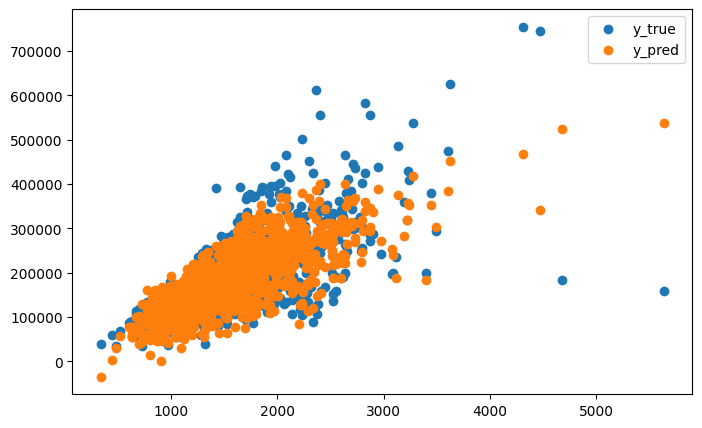

In [58]:
plt.figure(figsize=(8, 5))
plt.scatter(X['GrLivArea'], y, label='y_true')  
plt.scatter(X['GrLivArea'], lr_model.predict(X), label='y_pred')
plt.legend()
plt.show()

## L2 규제 - Ridge 모델

In [59]:
from sklearn.linear_model import Ridge
ridge_models = []
for alpha in [0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr, y_tr)
    ridge_models.append(ridge)
    print(f"alpha: {alpha}")
    print(f"훈련 셋: {ridge.score(X_tr, y_tr)}")
    print(f"검증 셋: {ridge.score(X_val, y_val)}")
    print()

alpha: 0.1
훈련 셋: 0.8332147031752475
검증 셋: 0.7286503844725287

alpha: 1
훈련 셋: 0.8332137854566292
검증 셋: 0.728638256739538

alpha: 10
훈련 셋: 0.8331463270882027
검증 셋: 0.7284937721150917

alpha: 100
훈련 셋: 0.8312598749708779
검증 셋: 0.7265245088366992



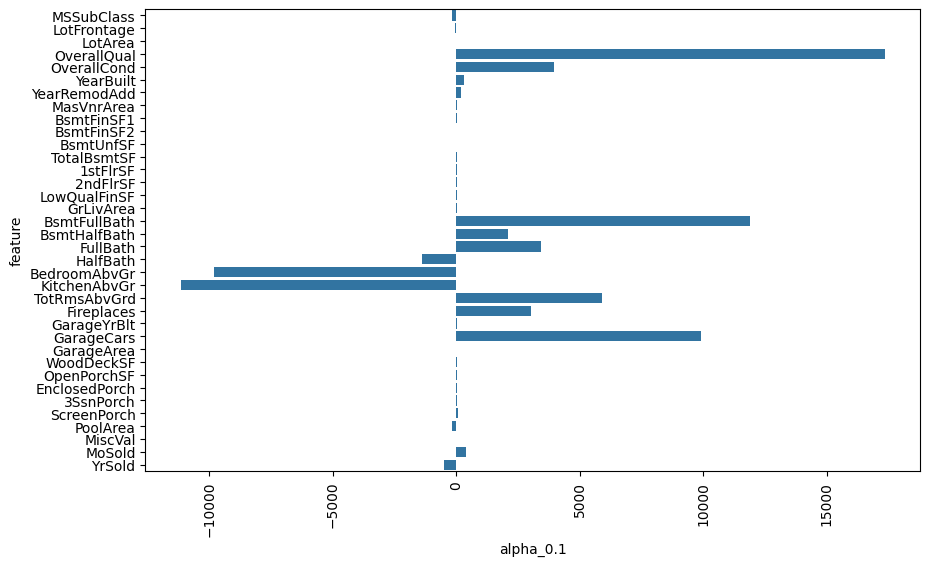

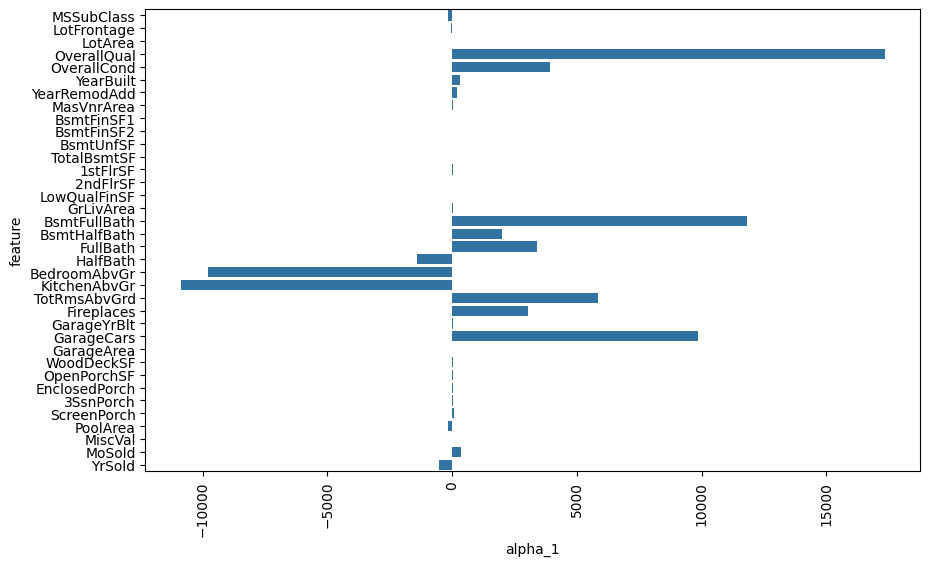

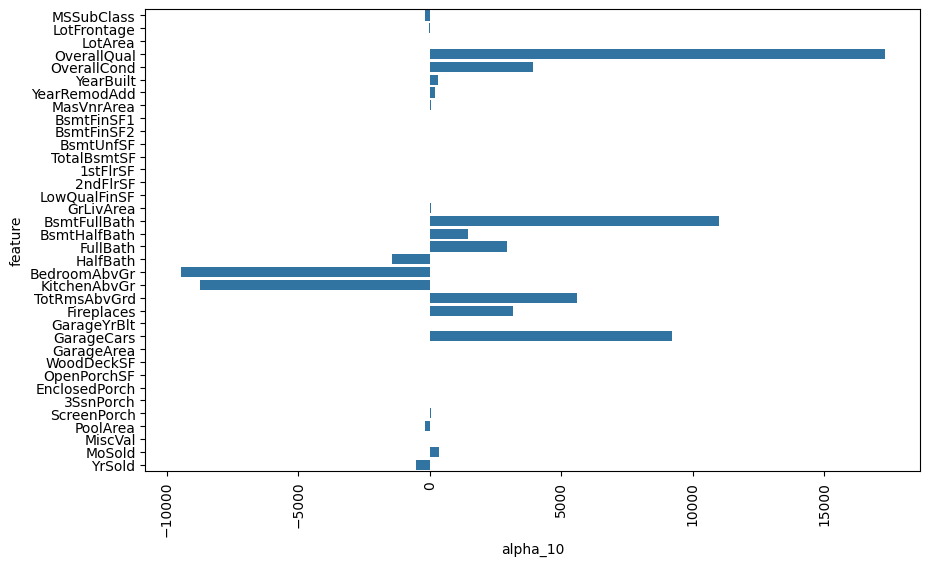

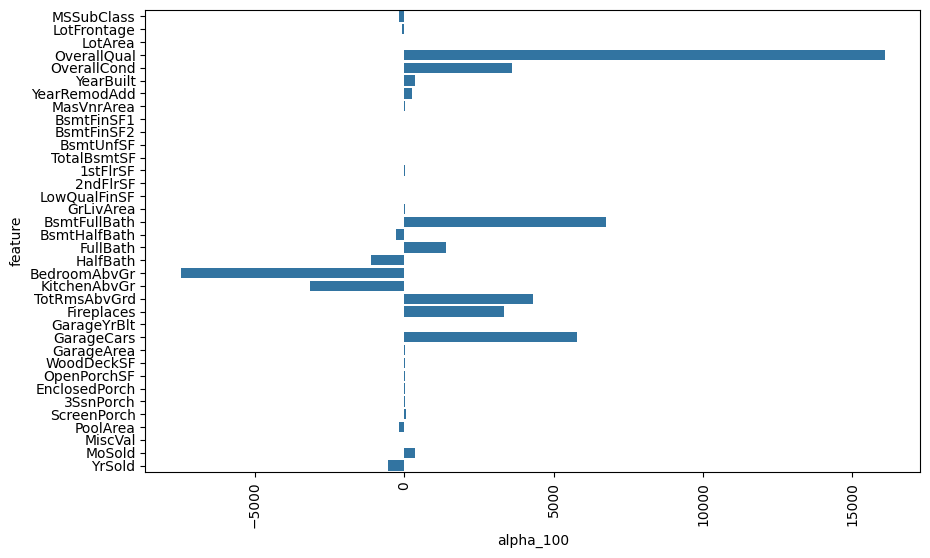

In [60]:
# 계수 확인 - 시각화
coefs = pd.DataFrame()
coefs['feature'] = X.columns
for idx, model in enumerate(ridge_models):
    coefs[f'alpha_{[0.1, 1, 10, 100][idx]}'] = model.coef_

    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefs, x=f'alpha_{[0.1, 1, 10, 100][idx]}', y='feature')
    plt.xticks(rotation=90)
    plt.show()

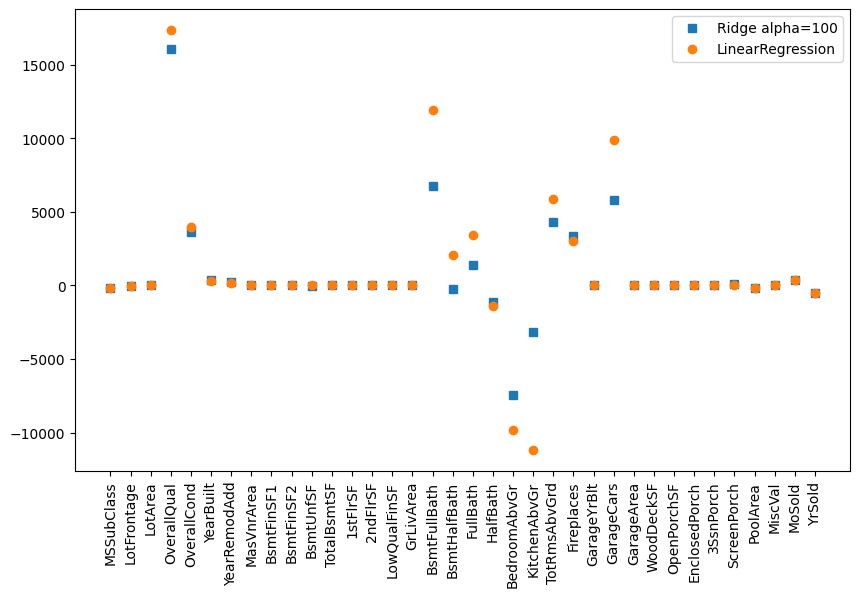

In [61]:
# 계수 확인 - 시각화
plt.figure(figsize=(10, 6))
plt.plot(ridge_models[-1].coef_, 's', label='Ridge alpha=100')
plt.plot(lr_model.coef_, 'o', label='LinearRegression')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.legend()
plt.show()

## L1 규제 - Lasso 모델

In [62]:
from sklearn.linear_model import Lasso
lasso_models = []

for alpha in [0.1, 1, 10, 100]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_tr, y_tr)
    lasso_models.append(lasso)
    print(f"alpha: {alpha}")
    print(f"훈련 셋: {lasso.score(X_tr, y_tr)}")
    print(f"검증 셋: {lasso.score(X_val, y_val)}")
    print()

alpha: 0.1
훈련 셋: 0.8332147126006382
검증 셋: 0.7286513734646463

alpha: 1
훈련 셋: 0.8332146939771459
검증 셋: 0.7286484775341151

alpha: 10
훈련 셋: 0.8332128312817714
검증 셋: 0.7286183907270015

alpha: 100
훈련 셋: 0.8330386596045766
검증 셋: 0.7282036919865273



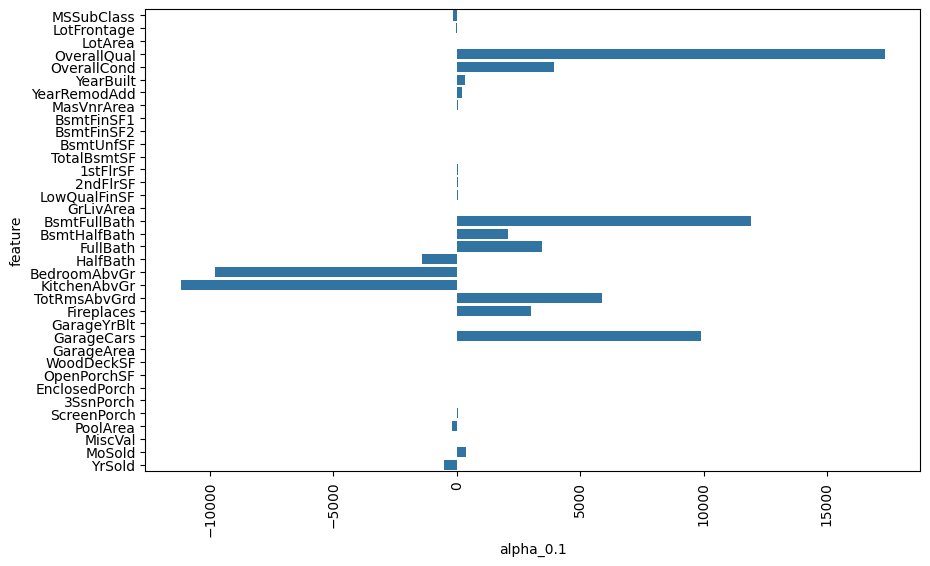

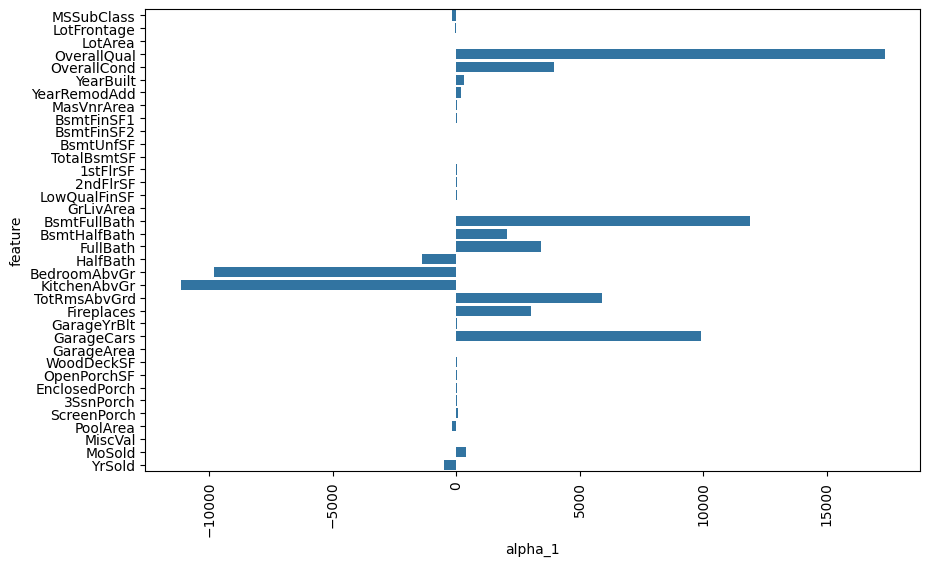

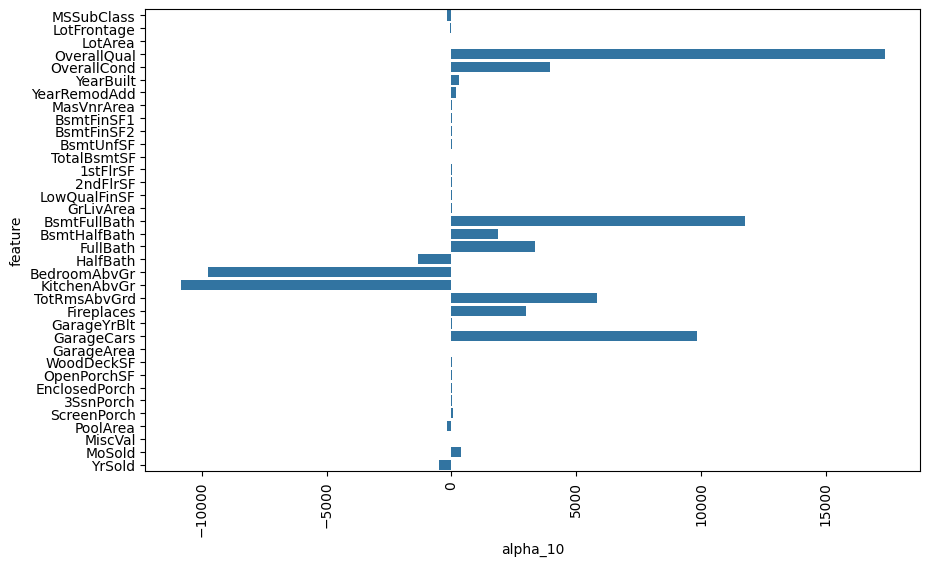

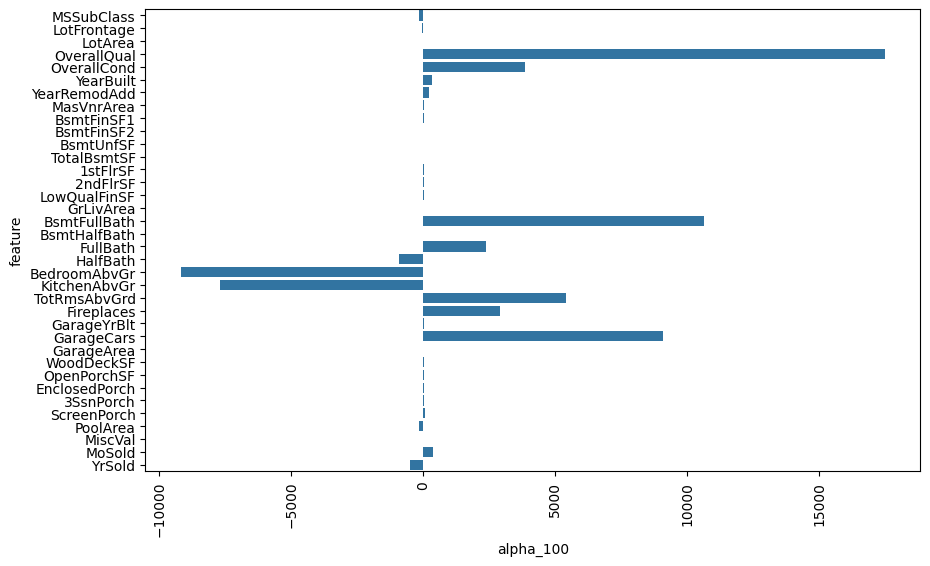

In [63]:
# 계수 확인 - 시각화
coefs = pd.DataFrame()
coefs['feature'] = X.columns
for idx, model in enumerate(lasso_models):
    coefs[f'alpha_{[0.1, 1, 10, 100][idx]}'] = model.coef_

    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefs, x=f'alpha_{[0.1, 1, 10, 100][idx]}', y='feature')
    plt.xticks(rotation=90)
    plt.show()

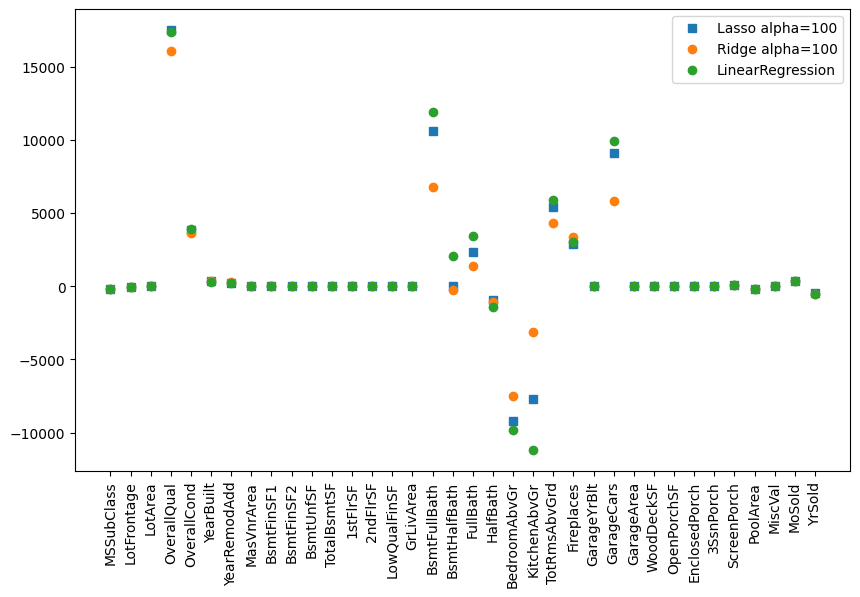

In [64]:
# 계수 확인 - 시각화
plt.figure(figsize=(10, 6))
plt.plot(lasso_models[-1].coef_, 's', label='Lasso alpha=100')
plt.plot(ridge_models[-1].coef_, 'o', label='Ridge alpha=100')
plt.plot(lr_model.coef_, 'o', label='LinearRegression')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.legend()
plt.show()

## L2/L1 규제 - ElasticNet 모델

In [65]:
from sklearn.linear_model import ElasticNet

elastic_models = []

for alpha in [0.1, 1, 10, 100]:
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5) # l1_ratio : L1 규제의 비율
    elastic.fit(X_tr, y_tr)
    elastic_models.append(elastic)
    print(f"alpha: {alpha}")
    print(f"훈련 셋: {elastic.score(X_tr, y_tr)}")
    print(f"검증 셋: {elastic.score(X_val, y_val)}")
    print()

alpha: 0.1
훈련 셋: 0.8322318749486243
검증 셋: 0.7274909430819281

alpha: 1
훈련 셋: 0.8197050119321388
검증 셋: 0.7154655165361049

alpha: 10
훈련 셋: 0.7853094328401679
검증 셋: 0.6851894225673595

alpha: 100
훈련 셋: 0.7723101470045359
검증 셋: 0.6794912991568024



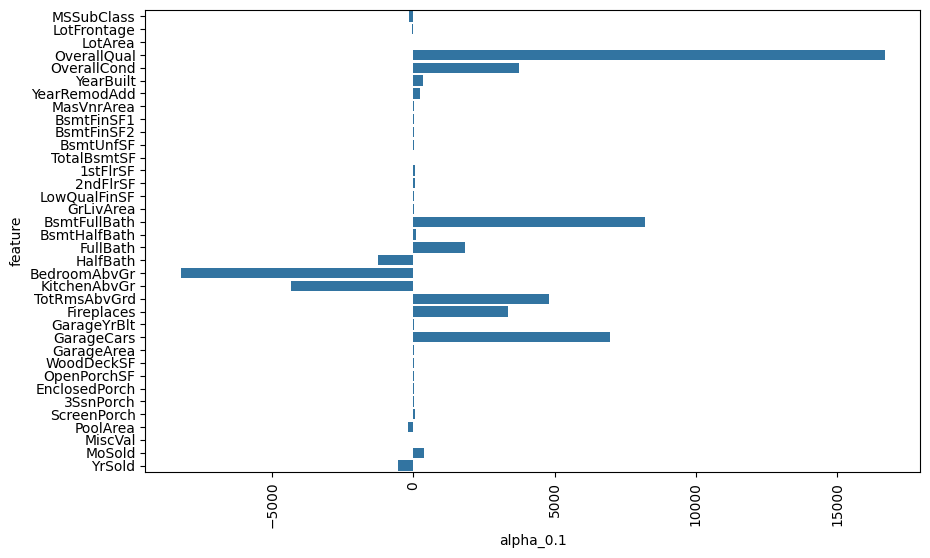

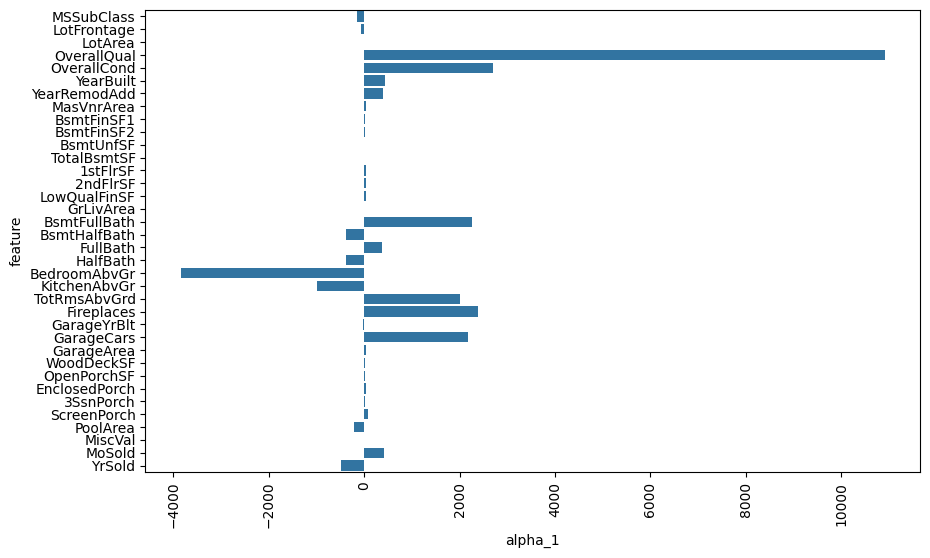

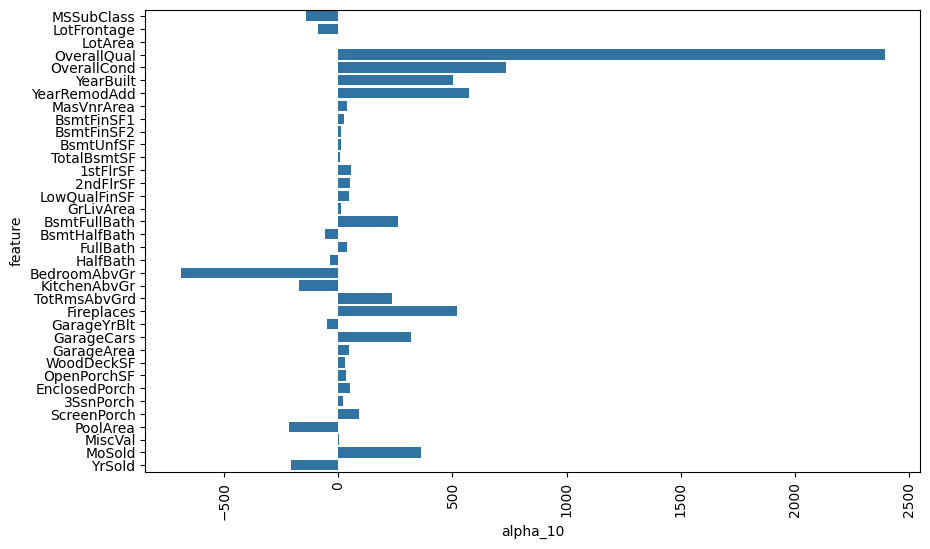

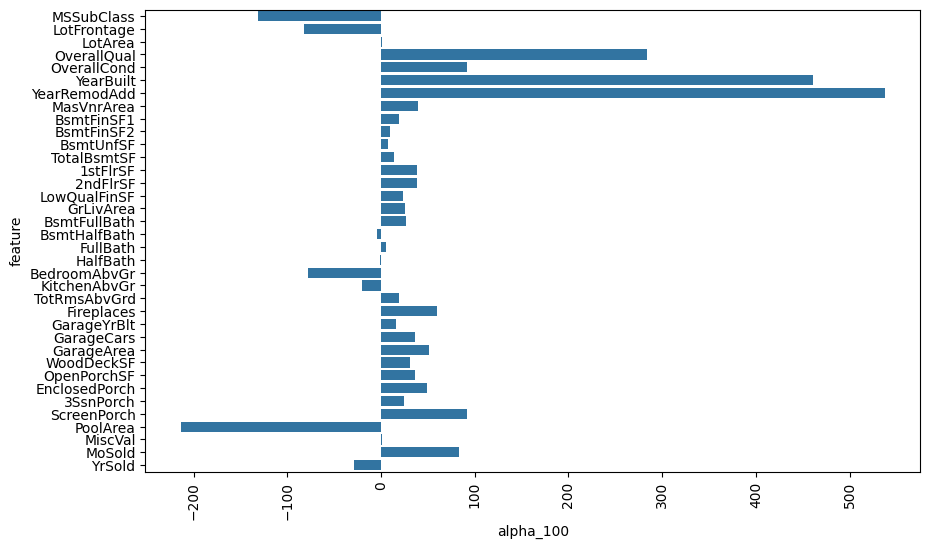

In [66]:
# 계수 확인 - 시각화
coefs = pd.DataFrame()
coefs['feature'] = X.columns

for idx, model in enumerate(elastic_models):
    coefs[f'alpha_{[0.1, 1, 10, 100][idx]}'] = model.coef_

    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefs, x=f'alpha_{[0.1, 1, 10, 100][idx]}', y='feature')
    plt.xticks(rotation=90)
    plt.show()

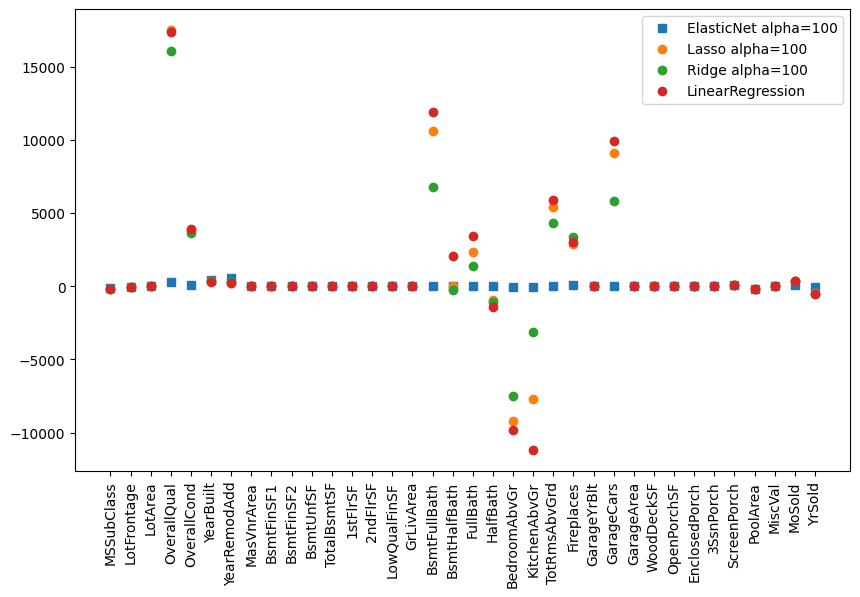

In [67]:
# 계수 확인 - 시각화

plt.figure(figsize=(10, 6))
plt.plot(elastic_models[-1].coef_, 's', label='ElasticNet alpha=100')
plt.plot(lasso_models[-1].coef_, 'o', label='Lasso alpha=100')
plt.plot(ridge_models[-1].coef_, 'o', label='Ridge alpha=100')
plt.plot(lr_model.coef_, 'o', label='LinearRegression')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.legend()
plt.show()

# 확률적 경사하강법

In [68]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)

sgd_model = SGDRegressor(
    loss='squared_error',     # 손실함수
    eta0=0.01,                # 초기 학습률
    max_iter=10000,           # 반복 횟수
    tol=1e-3                  # 조기 종료 조건
)

sgd_model.fit(X_tr_scaled, y_tr)

# 성능 평가 (R^2 결정계수)
print(f"훈련 셋: {sgd_model.score(X_tr_scaled, y_tr)}")
print(f"검증 셋: {sgd_model.score(X_val_scaled, y_val)}")

훈련 셋: 0.8324569629545754
검증 셋: 0.7235915782069585


In [69]:
# 성능 평가 (MSE)
print(f"훈련 셋: {mean_squared_error(y_tr, sgd_model.predict(X_tr_scaled))}")
print(f"검증 셋: {mean_squared_error(y_val, sgd_model.predict(X_val_scaled))}")

훈련 셋: 962376145.1321356
검증 셋: 2363112075.086594


In [70]:
# 성능 평가 (MAE)
print(f"훈련 셋: {mean_absolute_error(y_tr, sgd_model.predict(X_tr_scaled))}")
print(f"검증 셋: {mean_absolute_error(y_val, sgd_model.predict(X_val_scaled))}")

훈련 셋: 20575.995444682292
검증 셋: 25798.25388151906


# 비선형 회귀 분석

In [71]:
# data에서 수치형 변수만 선택 (과대적합 데이터)
X = data.select_dtypes(include=['number'])
X = X.drop(['Id', 'SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

In [72]:
# 결측치 처리
X = X.fillna(X.mean())
X.isnull().sum().sort_values(ascending=False)

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [73]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=X['OverallQual'], random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_tr, y_tr)

LinearRegression()

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4) # n_neighbors 값을 조절하는 것이 중요하다.
knn.fit(X_tr, y_tr)

print(f"훈련 셋: {knn.score(X_tr, y_tr)}")
print(f"검증 셋: {knn.score(X_val, y_val)}")

훈련 셋: 0.8023635449962838
검증 셋: 0.5822933982822356


In [75]:
# 성능 평가 (MSE)
print(f"훈련 셋: {mean_squared_error(y_tr, knn.predict(X_tr))}")
print(f"검증 셋: {mean_squared_error(y_val, knn.predict(X_val))}")

훈련 셋: 1135234343.7136664
검증 셋: 3571119533.7662673


In [76]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_tr, y_tr)

print(f"훈련 셋: {svr.score(X_tr, y_tr)}")
print(f"검증 셋: {svr.score(X_val, y_val)}")

훈련 셋: -0.051599039533311464
검증 셋: -0.048884763532281106


# 피처 스케일링

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)

In [78]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_tr_scaled, y_tr)

print(f"훈련 셋: {knn.score(X_tr_scaled, y_tr)}")
print(f"검증 셋: {knn.score(X_val_scaled, y_val)}")

훈련 셋: 0.8741587673389153
검증 셋: 0.69929404464142


In [79]:
svr = SVR(kernel='rbf')
svr.fit(X_tr_scaled, y_tr)

print(f"훈련 셋: {svr.score(X_tr_scaled, y_tr)}")
print(f"검증 셋: {svr.score(X_val_scaled, y_val)}")

훈련 셋: -0.05039100813187658
검증 셋: -0.04805251541693867


# 다른 비선형 알고리즘

In [80]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=3, random_state=42) # 과적합이 있으면 max_depth 줄이기
decision_tree.fit(X_tr, y_tr)

print(f"훈련 셋: {decision_tree.score(X_tr, y_tr)}")
print(f"검증 셋: {decision_tree.score(X_val, y_val)}")

훈련 셋: 0.7301557358161939
검증 셋: 0.636377670545293


In [81]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=200, max_depth=2, random_state=42) # n_estimators : tree 의 개수
random_forest.fit(X_tr, y_tr)

print(f"훈련 셋: {random_forest.score(X_tr, y_tr)}")
print(f"검증 셋: {random_forest.score(X_val, y_val)}")

훈련 셋: 0.7139505425530158
검증 셋: 0.6389565812062394


In [82]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators=100, max_depth=3, random_state=2021)
xgbr.fit(X_tr, y_tr)

print(f"훈련 셋: {xgbr.score(X_tr, y_tr)}")
print(f"검증 셋: {xgbr.score(X_val, y_val)}")

훈련 셋: 0.9832895398139954
검증 셋: 0.8210676908493042


In [83]:
from lightgbm import LGBMRegressor
lgbr = LGBMRegressor(n_estimators=100, max_depth=3, random_state=2021)
lgbr.fit(X_tr, y_tr)

print(f"훈련 셋: {lgbr.score(X_tr, y_tr)}")
print(f"검증 셋: {lgbr.score(X_val, y_val)}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2904
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 180273.876712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

# [추가 분석] 

### 변수 유형 구분

In [84]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [85]:
# 숫자형
numerics = [col for col in data.columns if data.dtypes[col] != 'object']
print(numerics)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [86]:
numerics.remove('SalePrice')
numerics.remove('Id')
print(numerics)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [87]:
# 범주형
categoricals = [col for col in data.columns if data.dtypes[col] == 'object']
print(categoricals)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### 숫자형 변수의 데이터 확인

In [88]:
data[numerics].describe()    

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

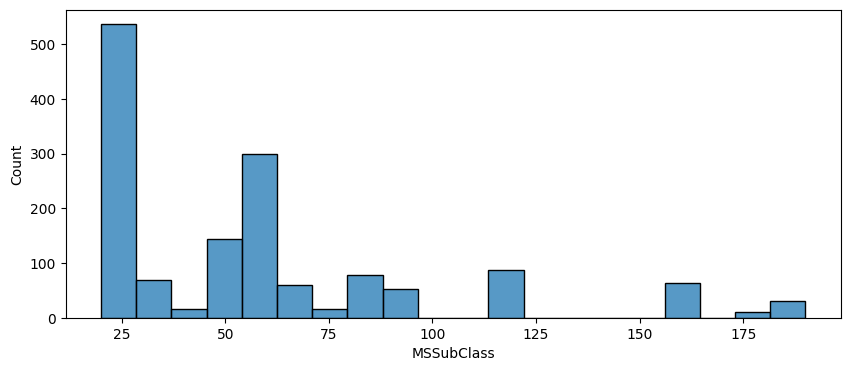

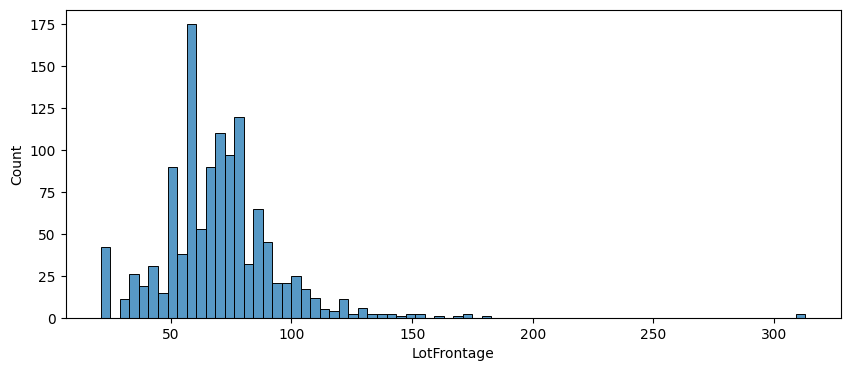

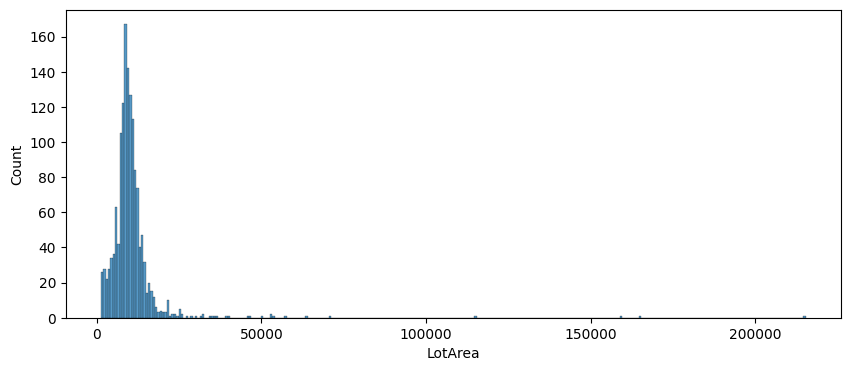

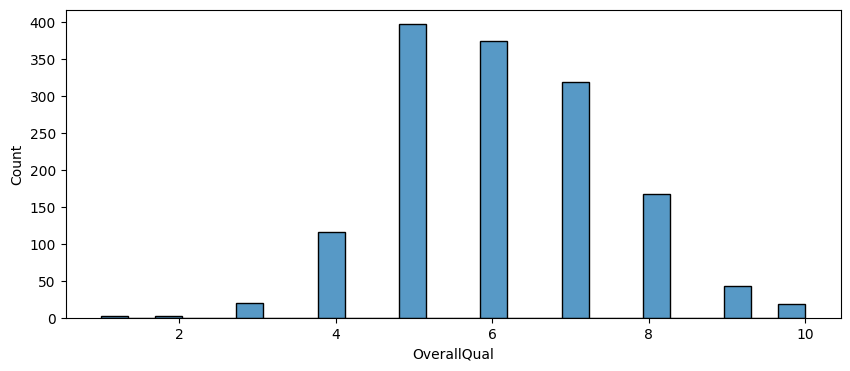

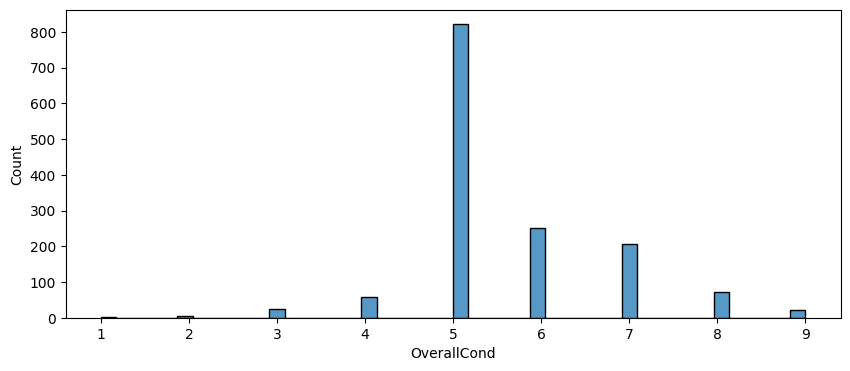

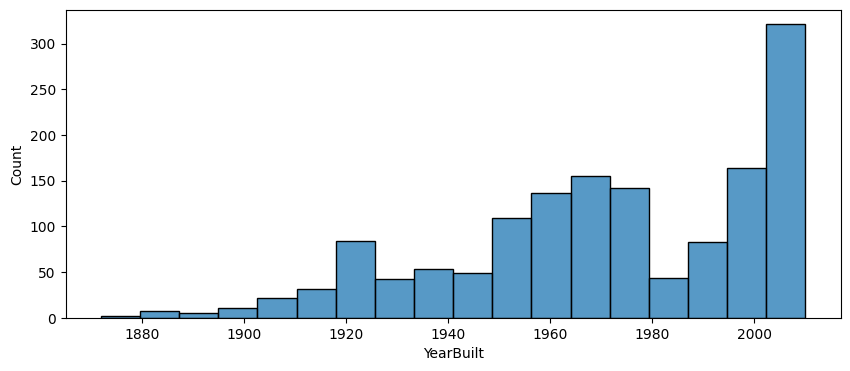

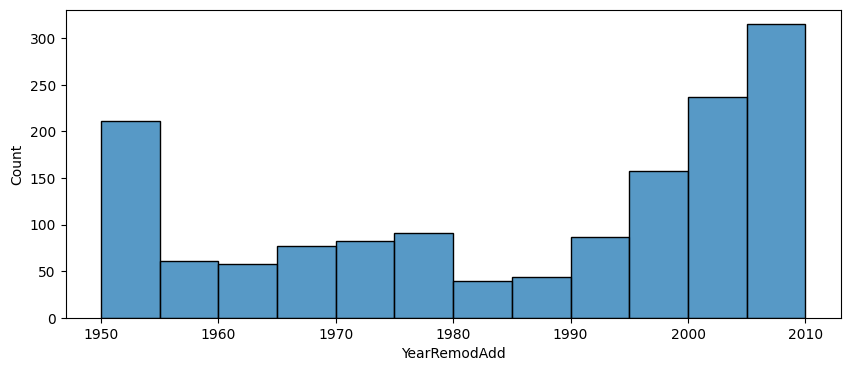

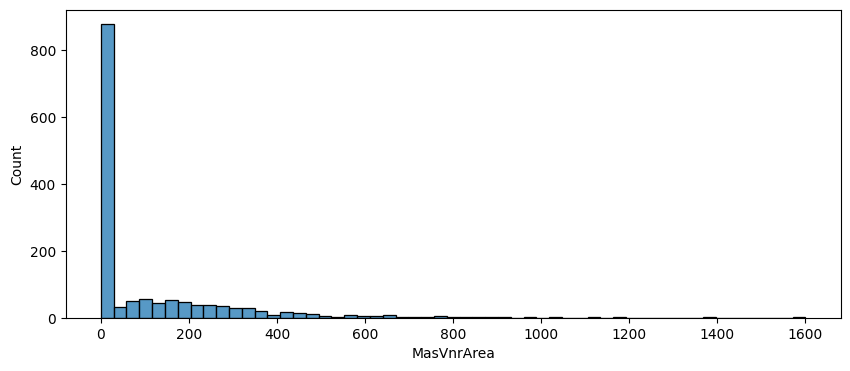

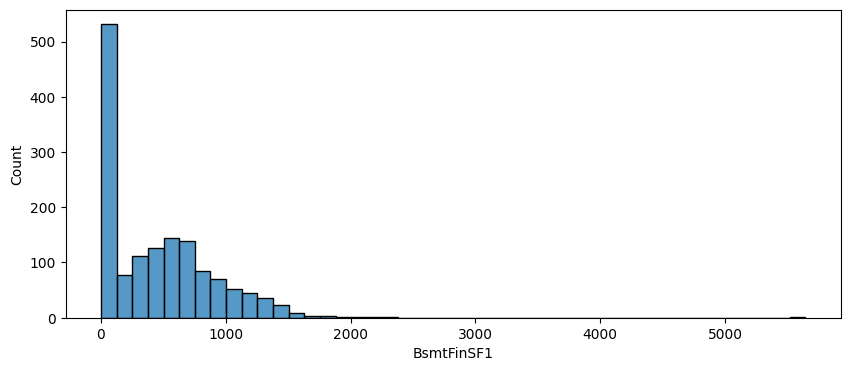

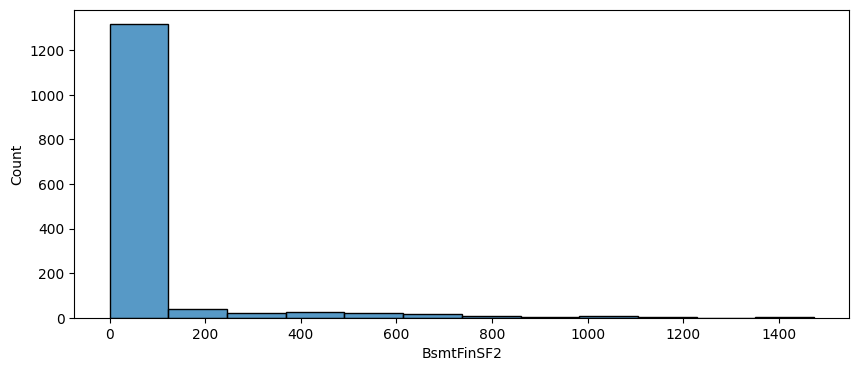

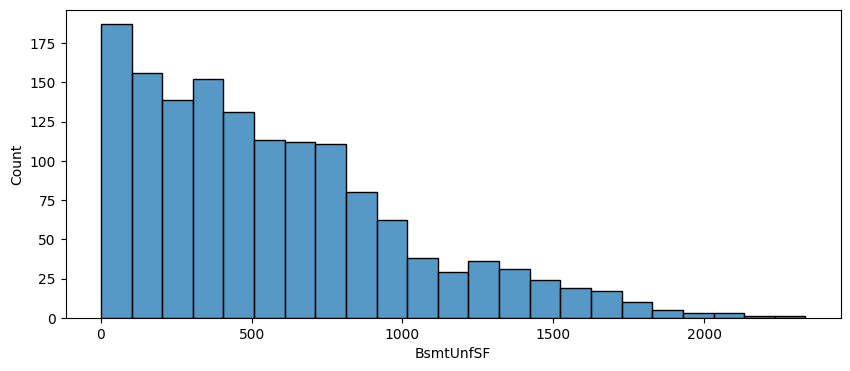

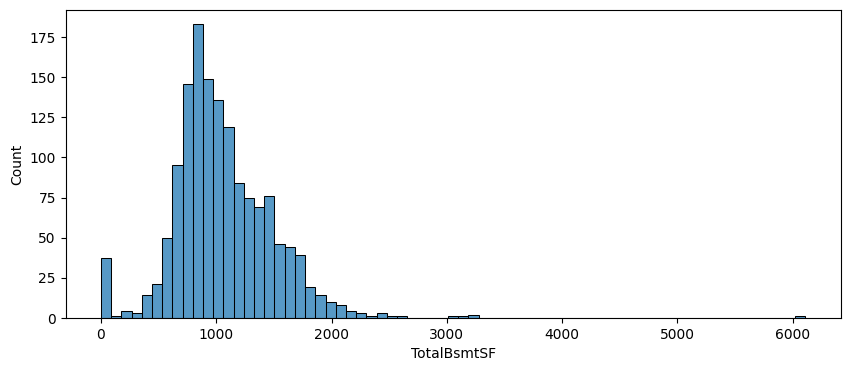

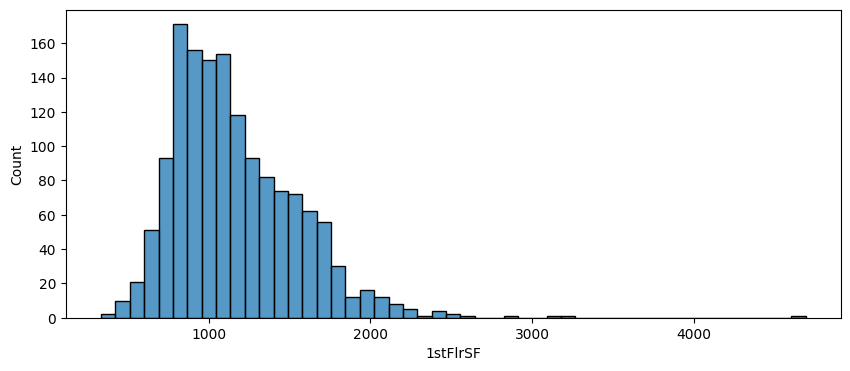

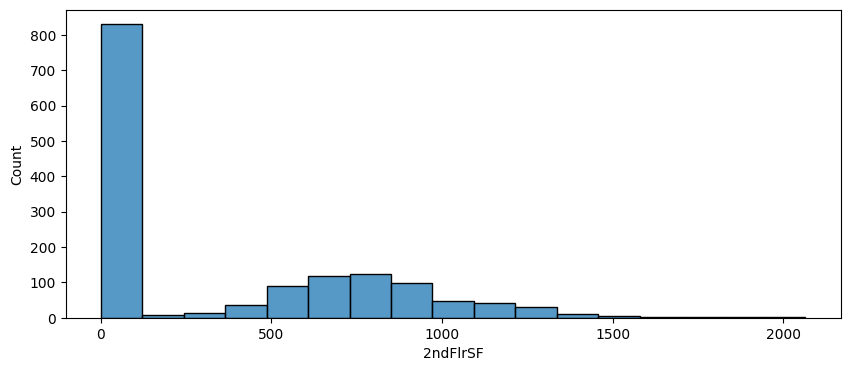

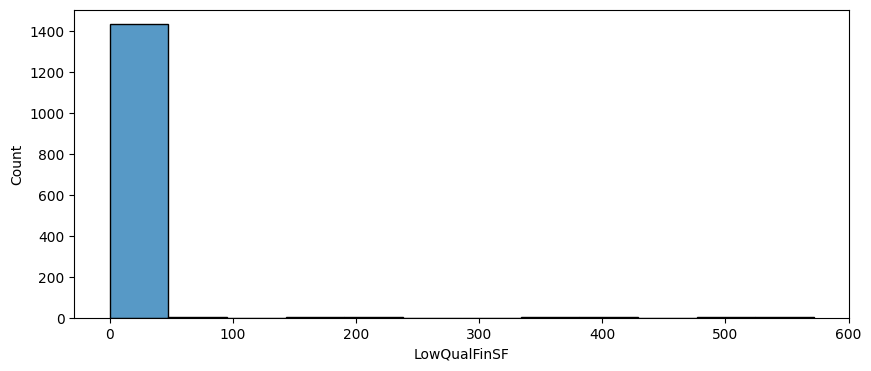

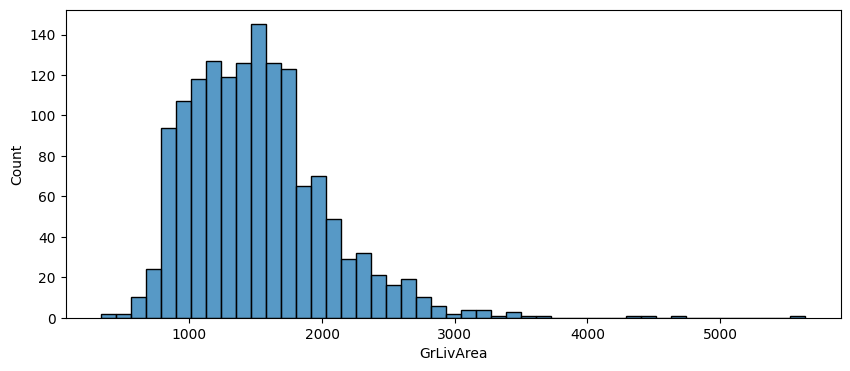

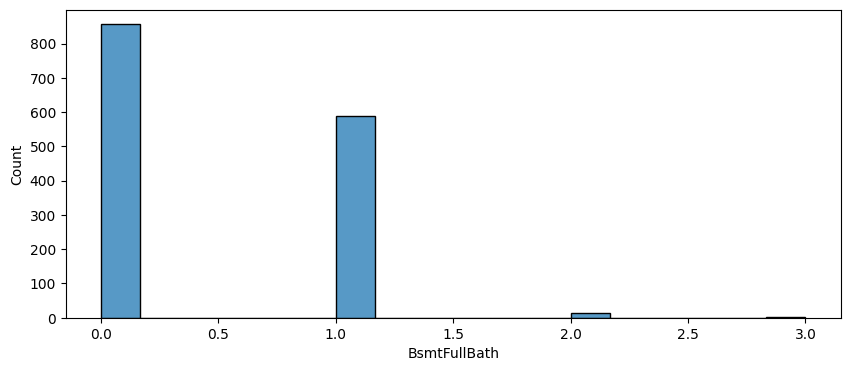

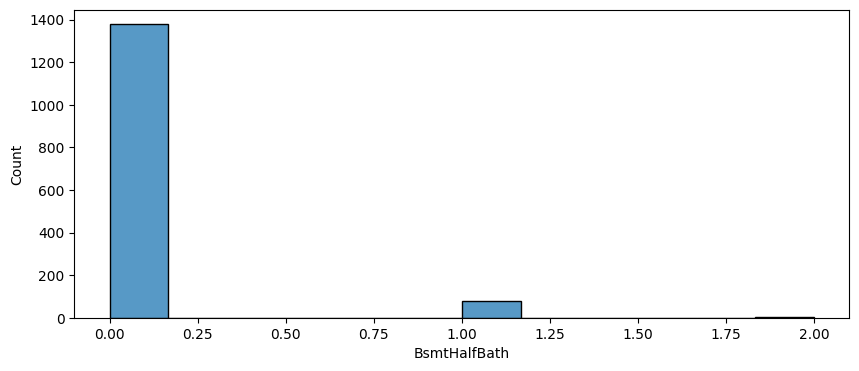

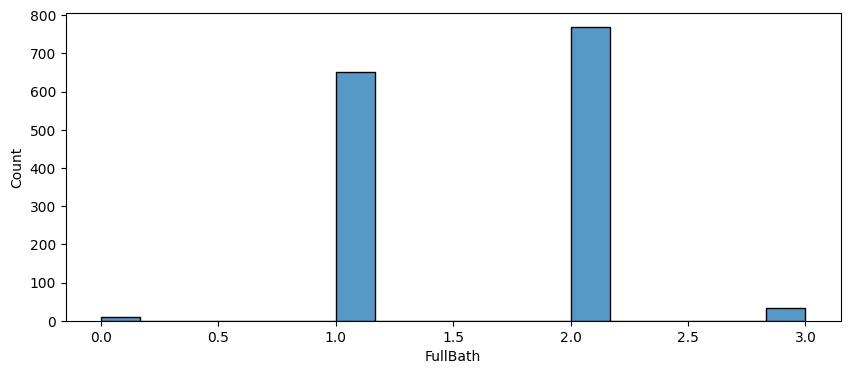

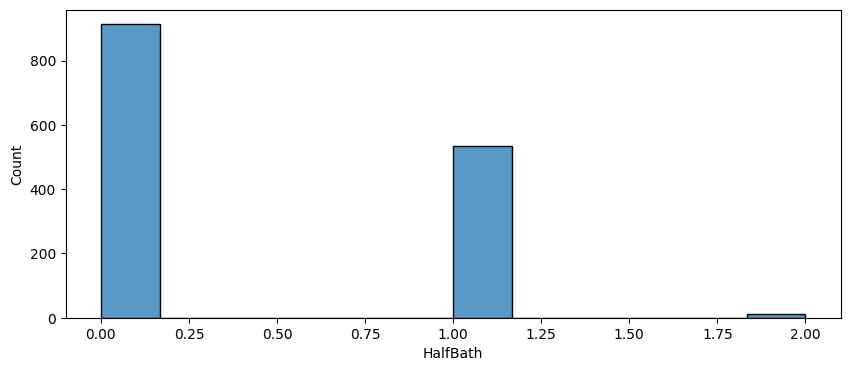

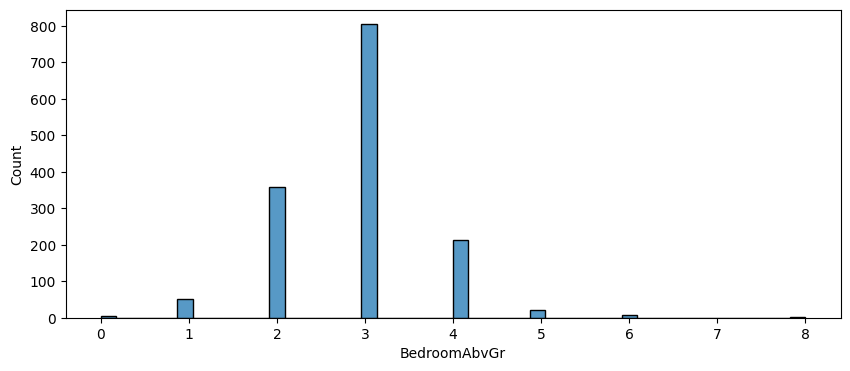

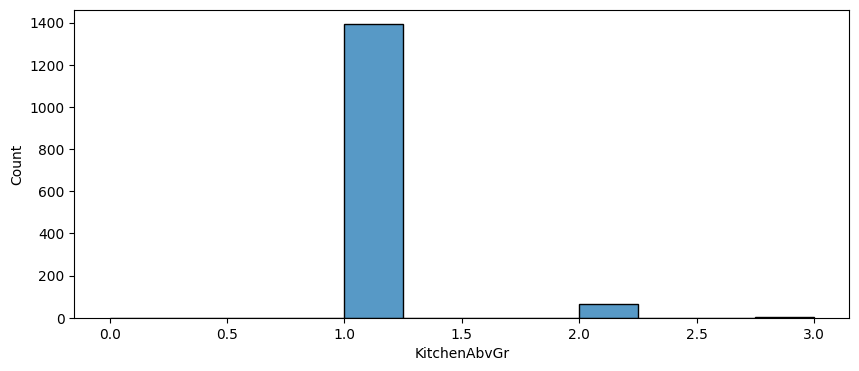

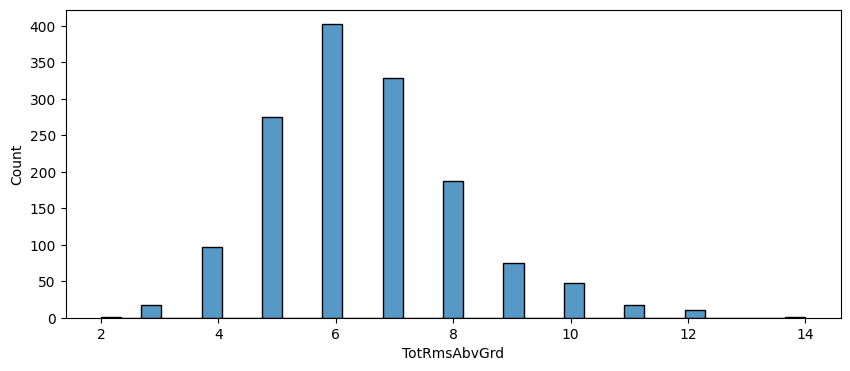

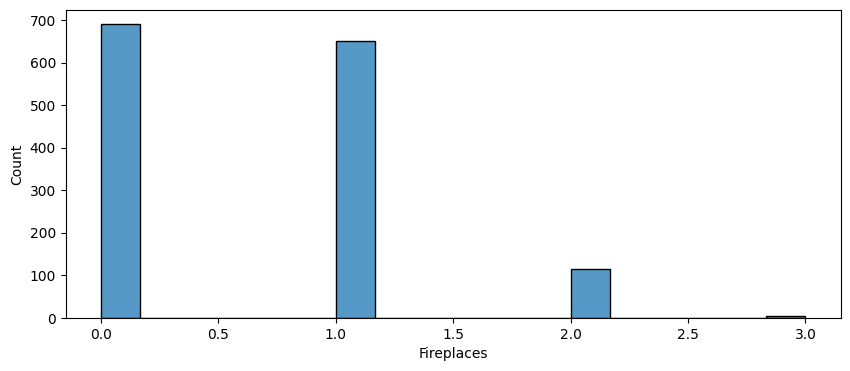

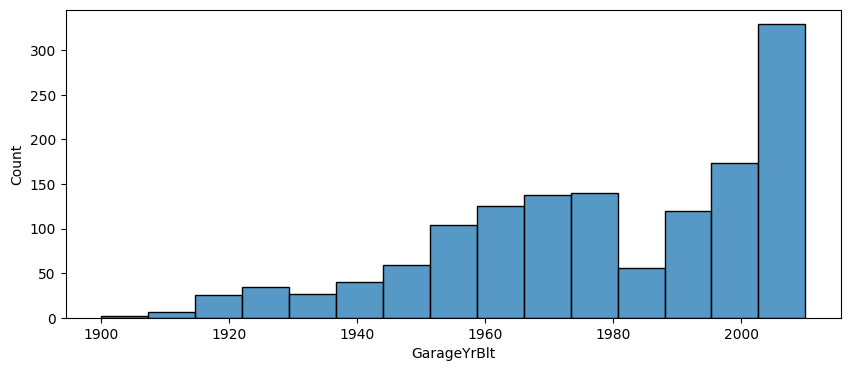

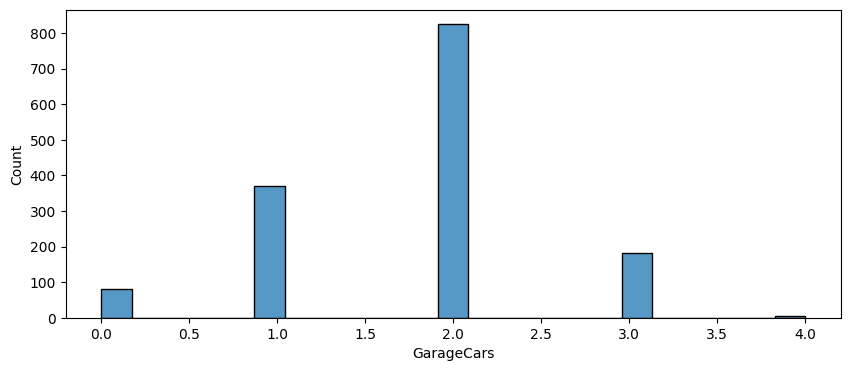

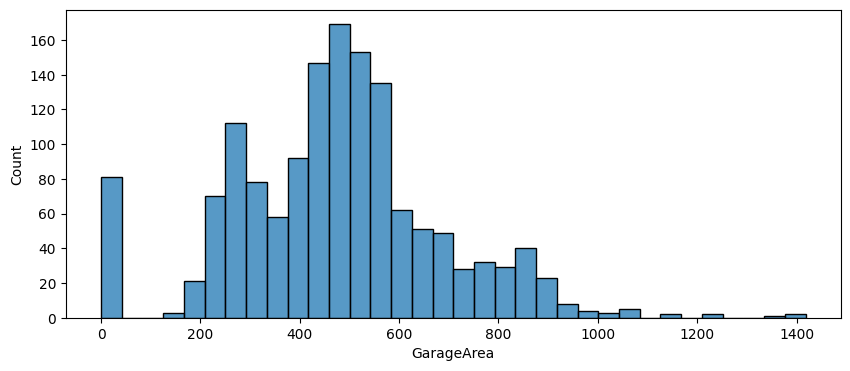

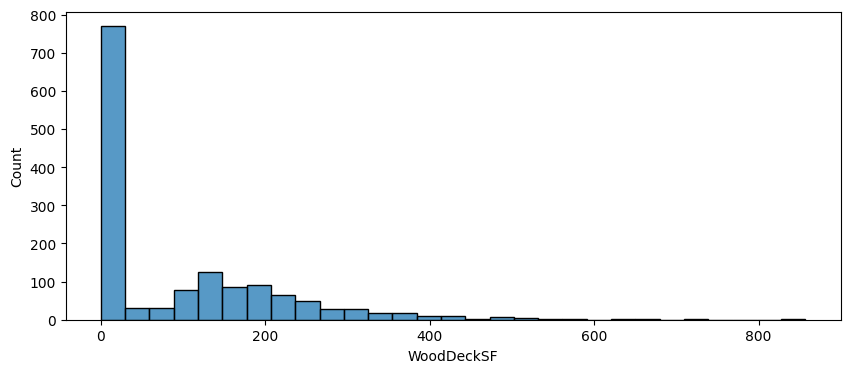

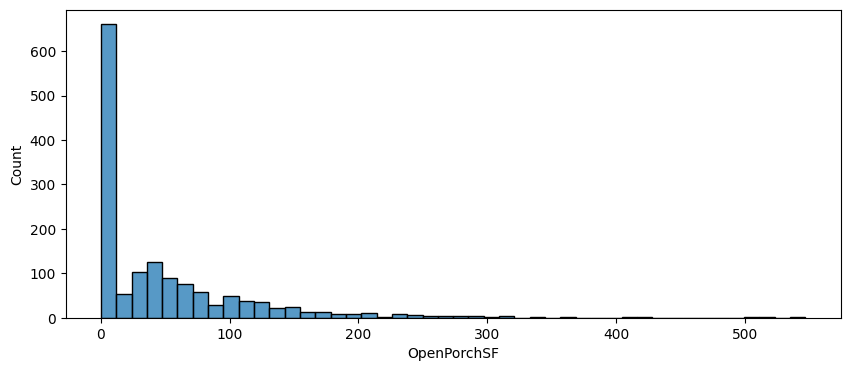

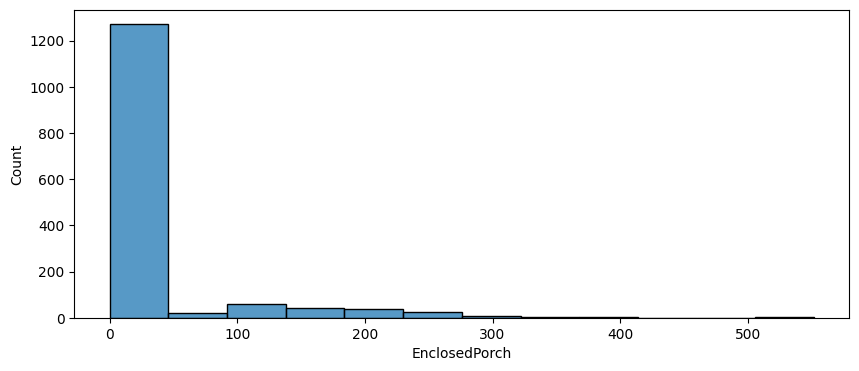

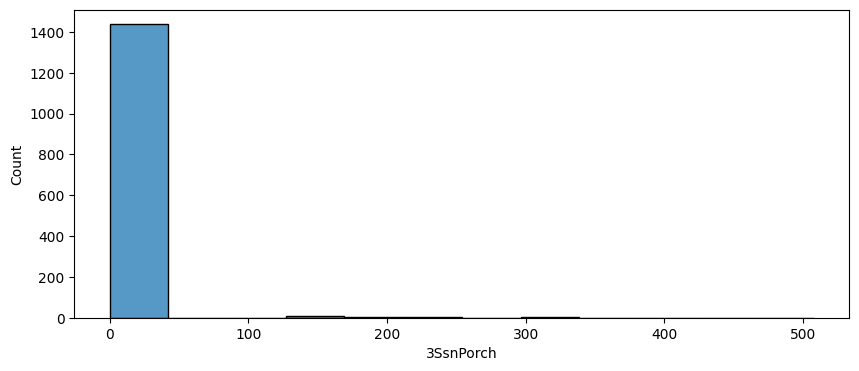

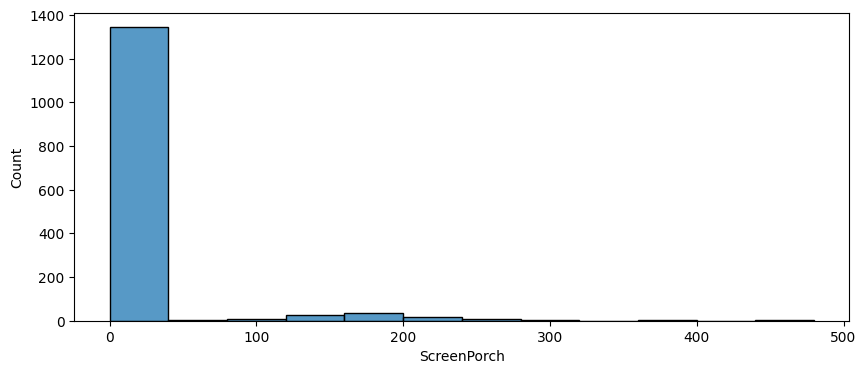

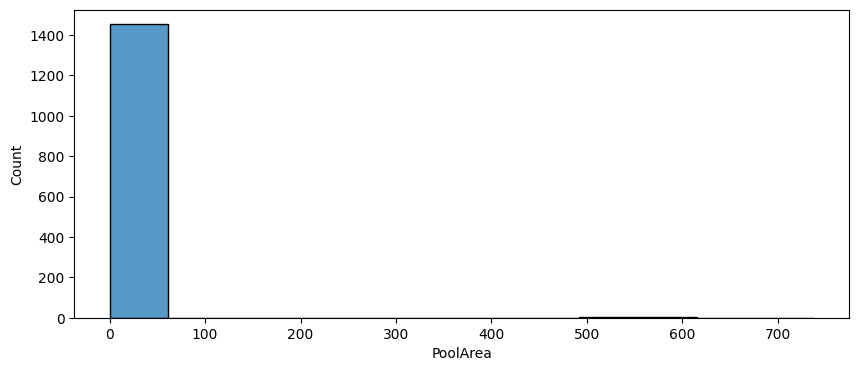

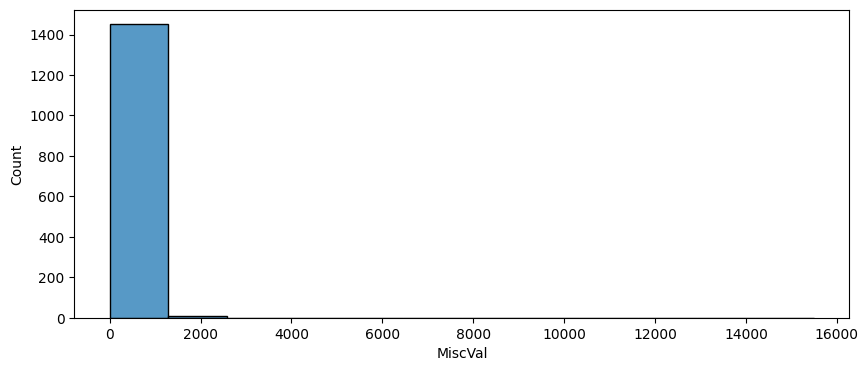

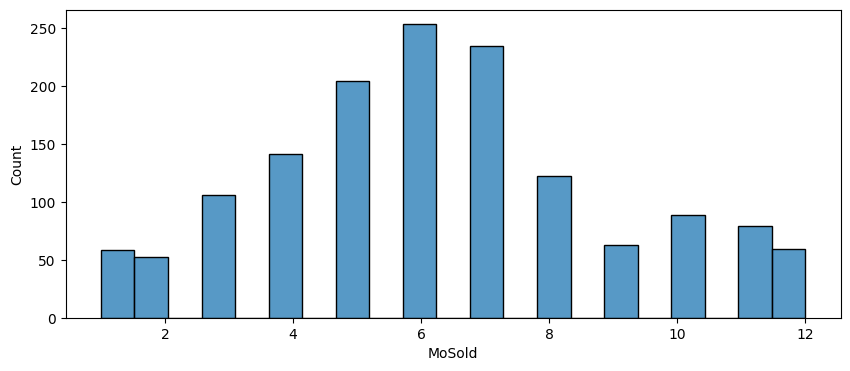

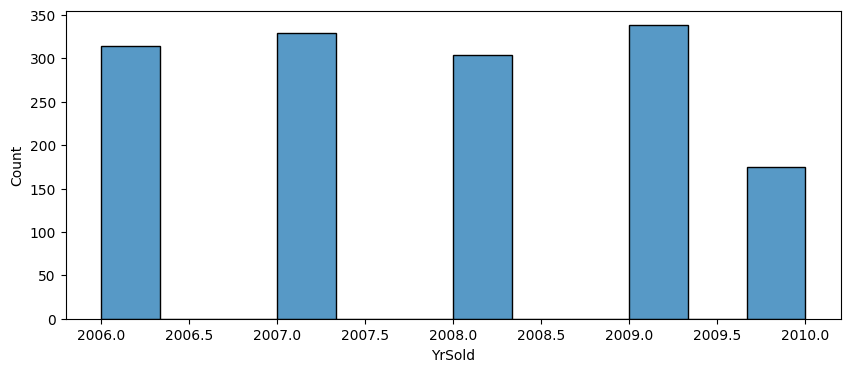

In [89]:
for col in numerics:
    plt.figure(figsize=(10, 4))
    sns.histplot(x=col, data=data)
    plt.show()

### 범주형 변수의 데이터 확인

In [90]:
for col in categoricals:
    print(data[col].value_counts(), '\n')

MSZoning
RL           1151
RM            218
FV             65
RH             16
'C (all)'      10
Name: count, dtype: int64 

Street
Pave    1454
Grvl       6
Name: count, dtype: int64 

Alley
Grvl    50
Pave    41
Name: count, dtype: int64 

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64 

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64 

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64 

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64 

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64 

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17

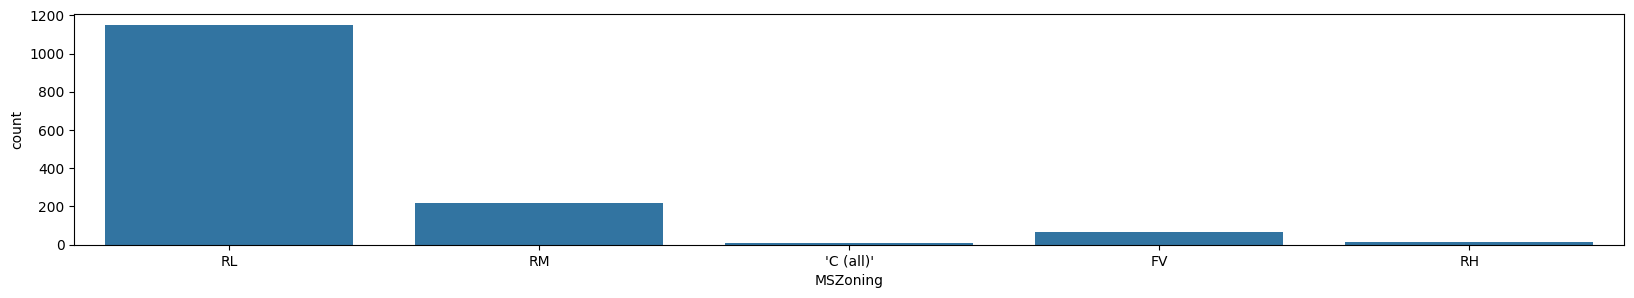

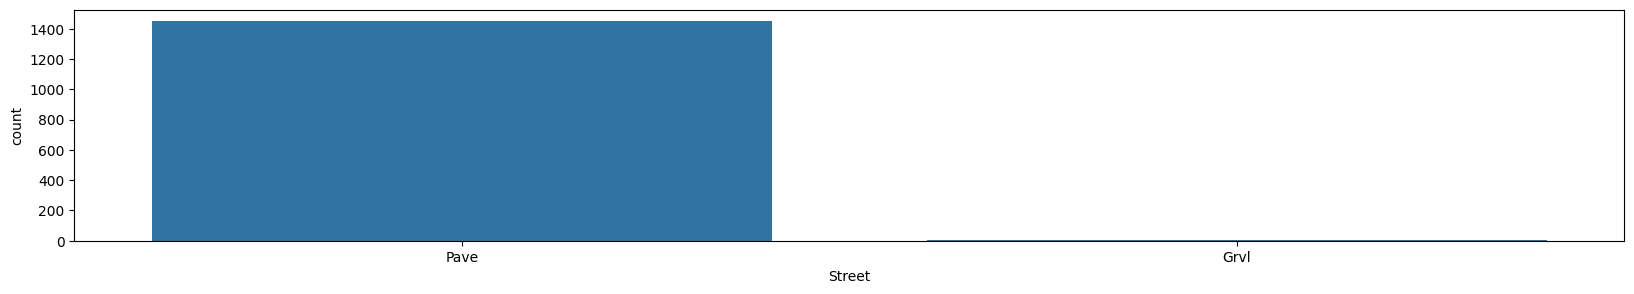

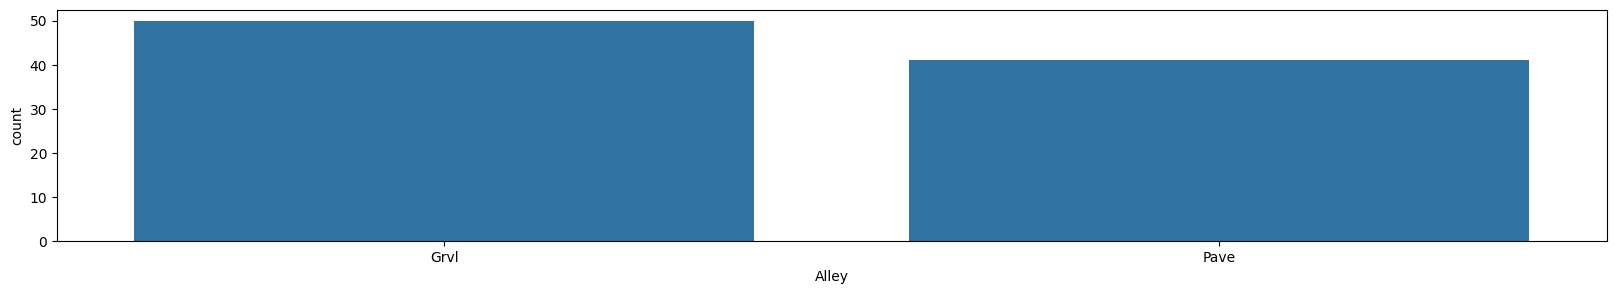

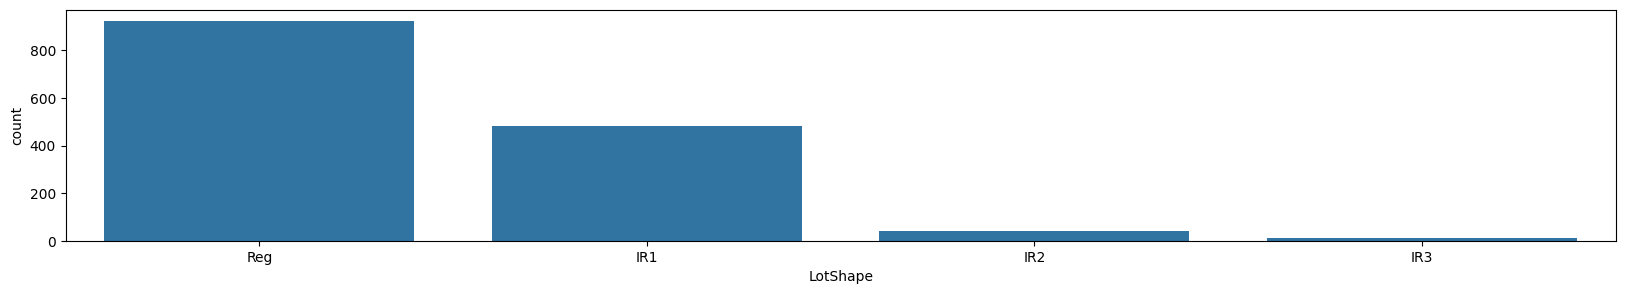

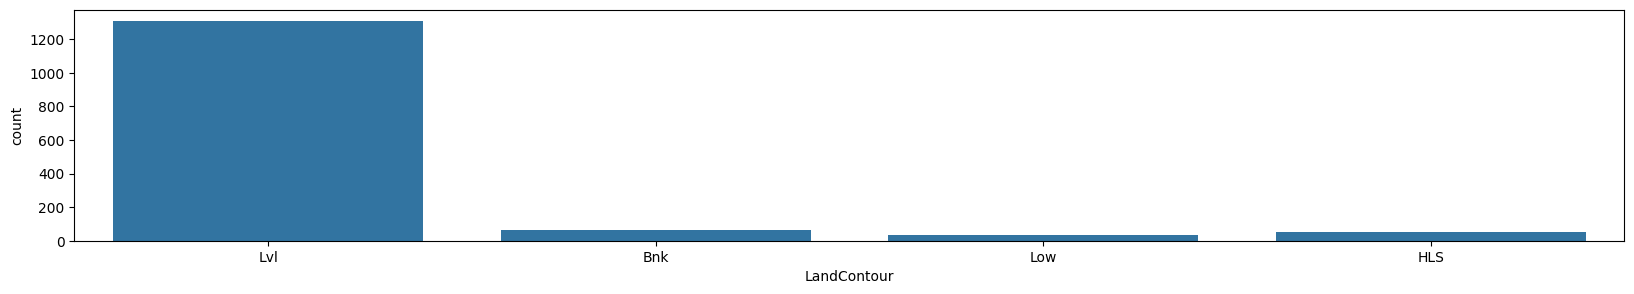

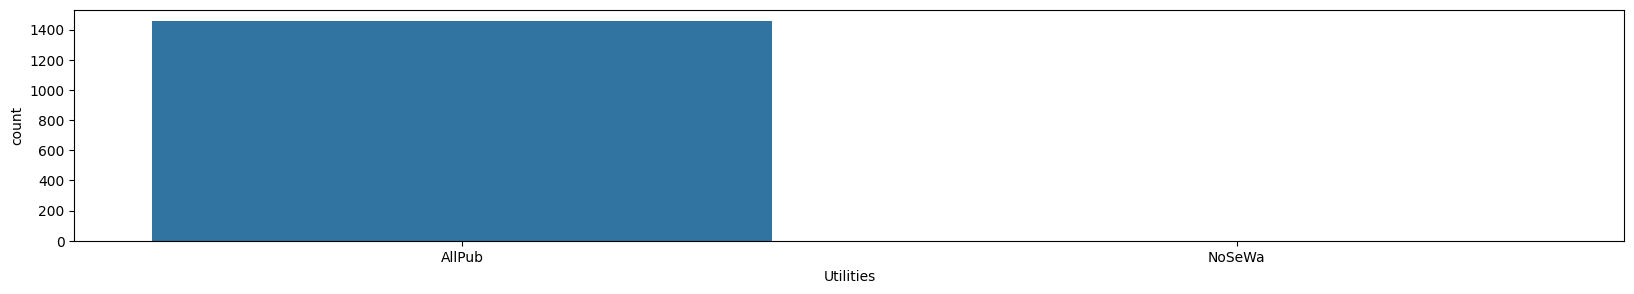

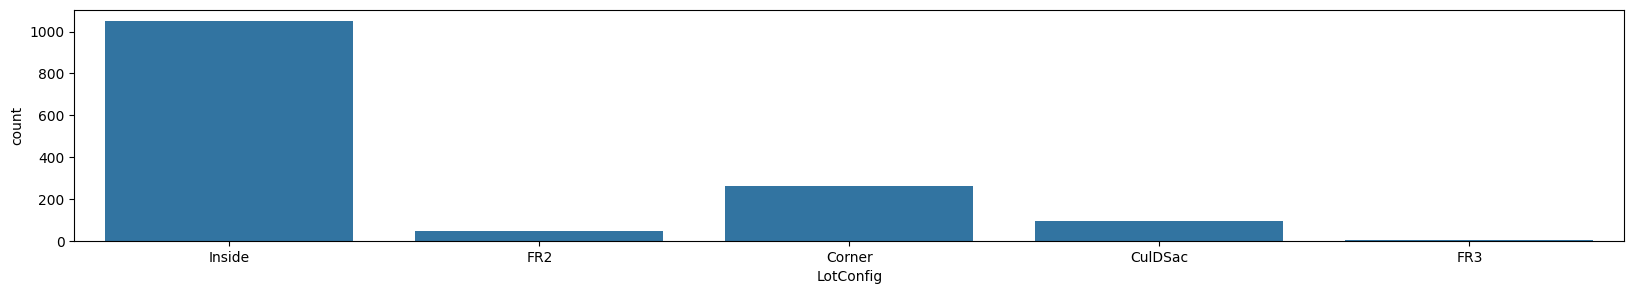

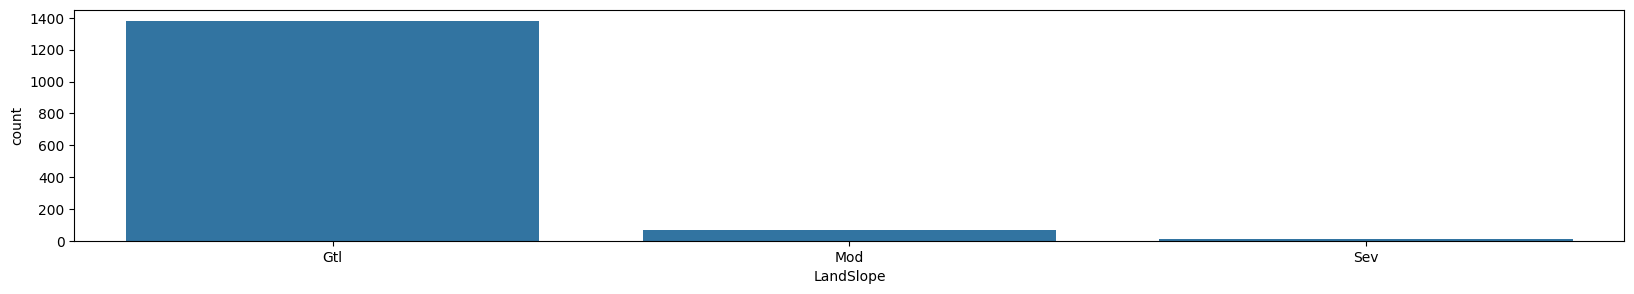

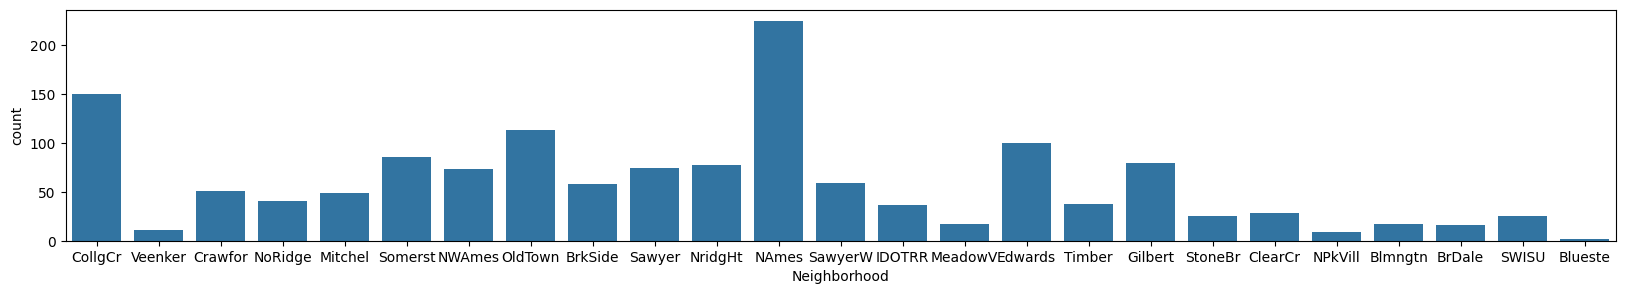

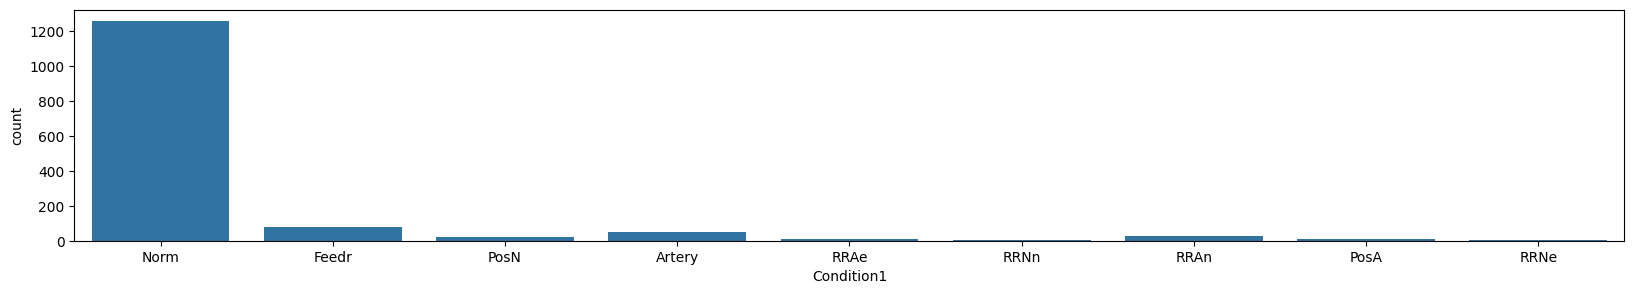

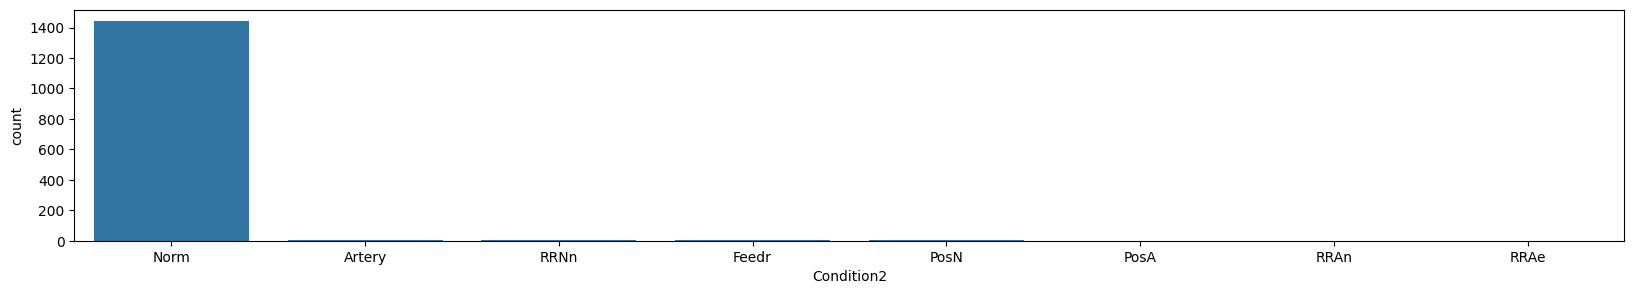

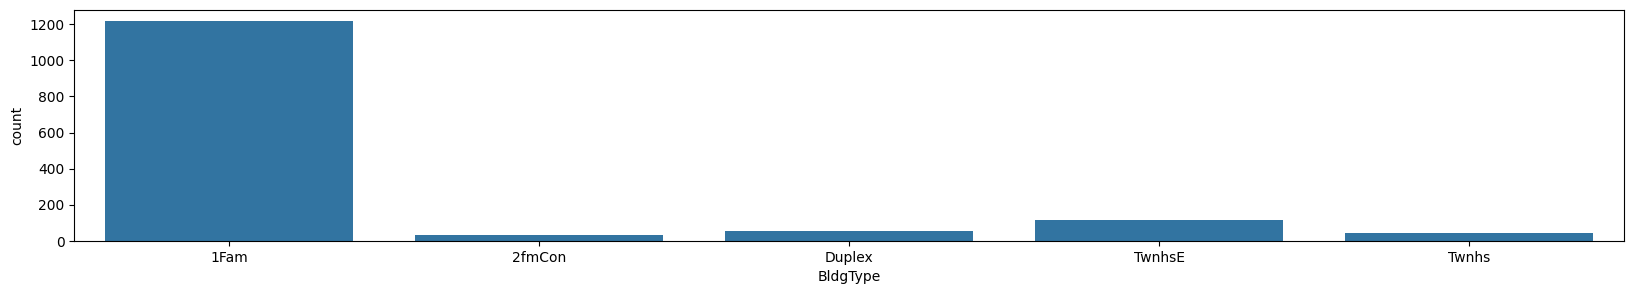

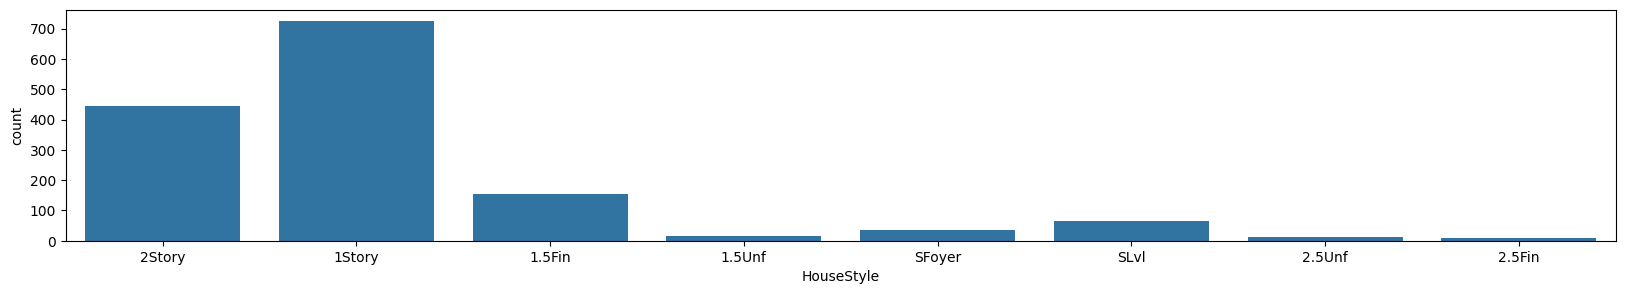

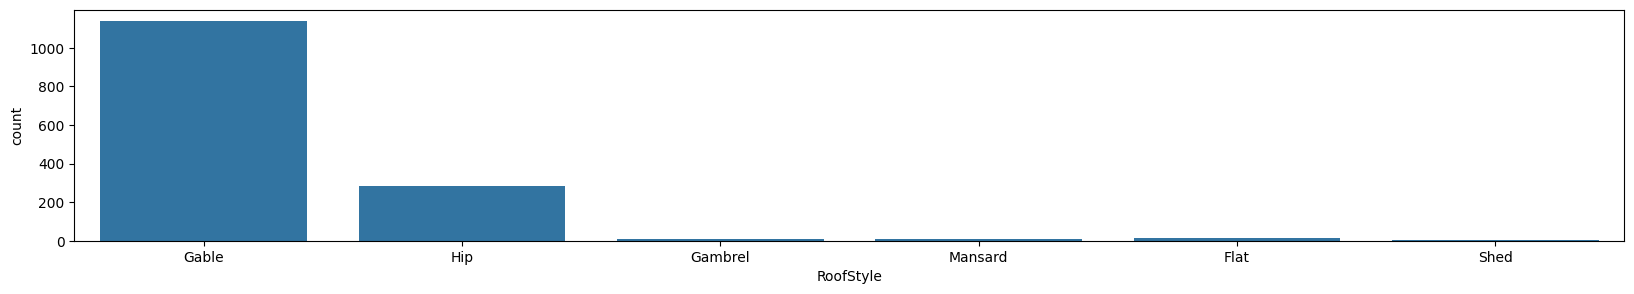

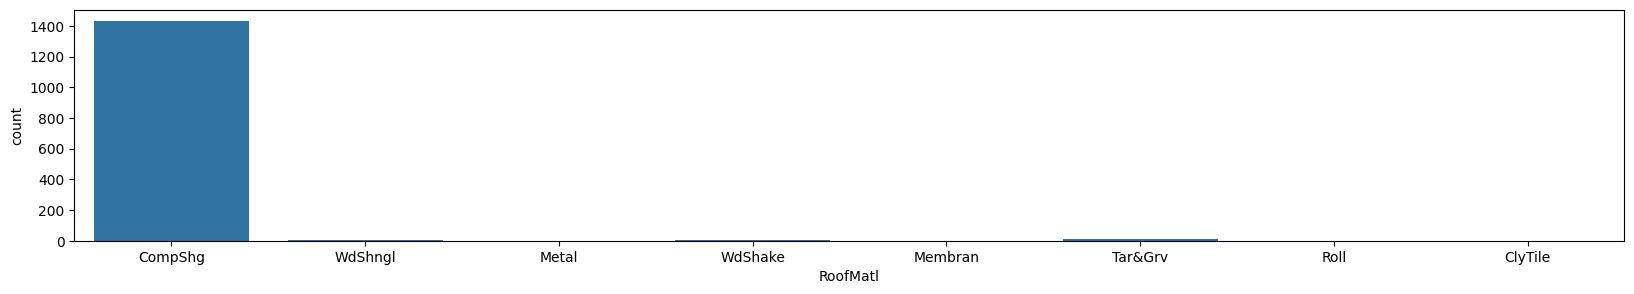

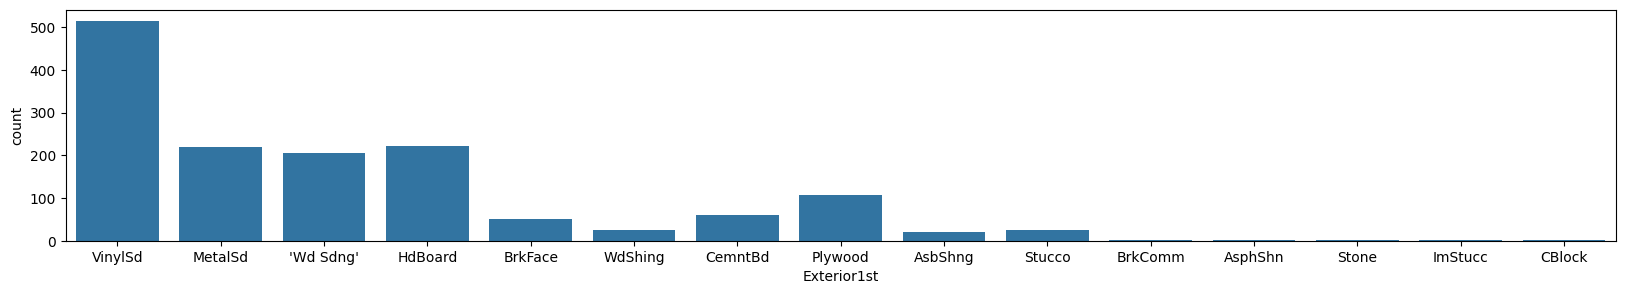

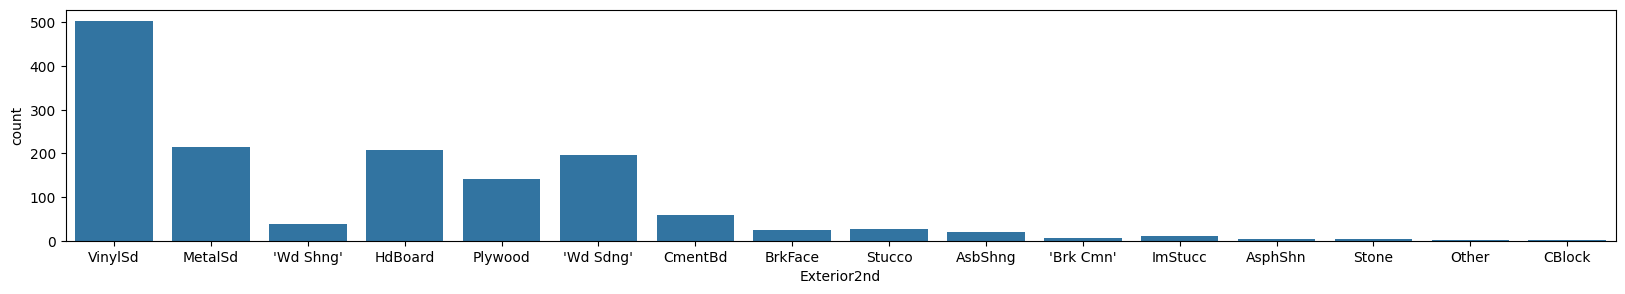

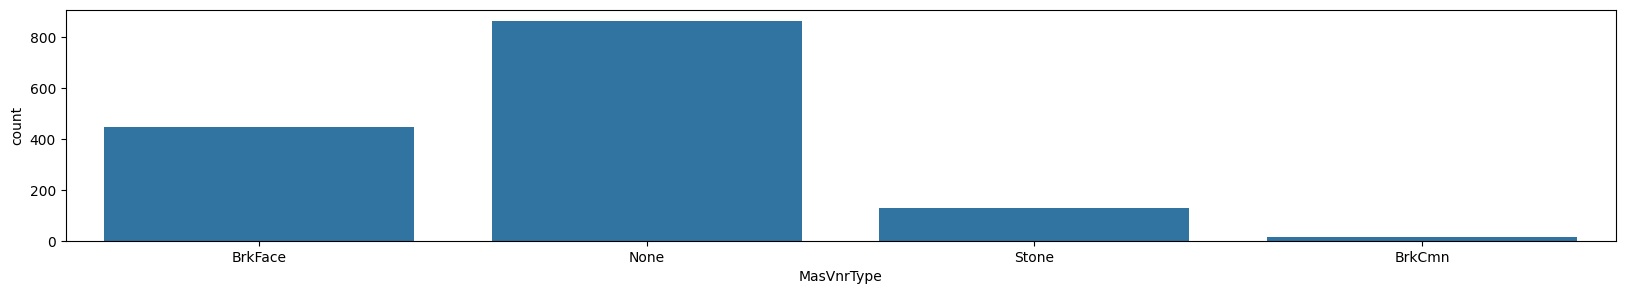

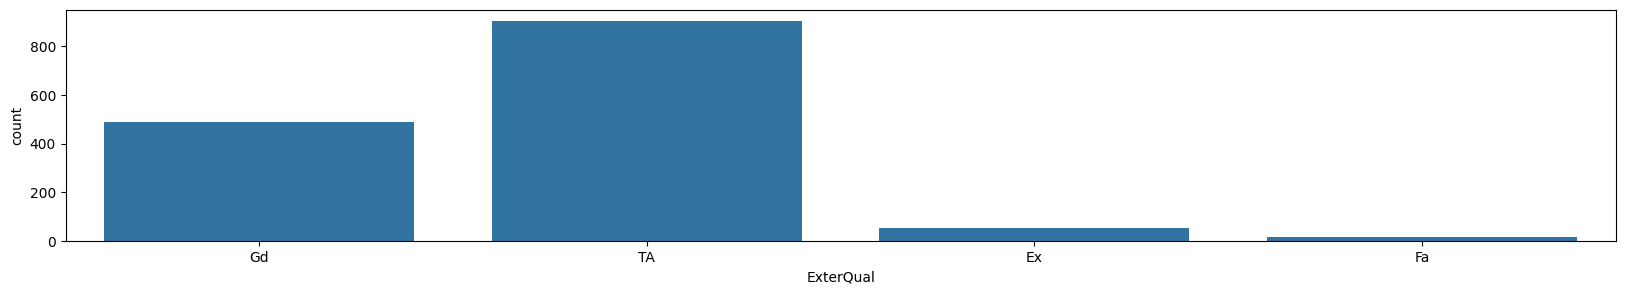

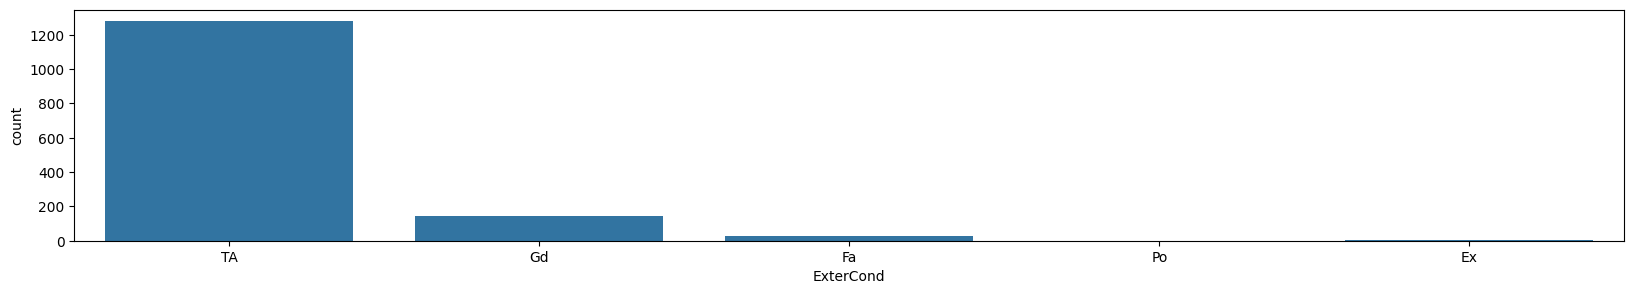

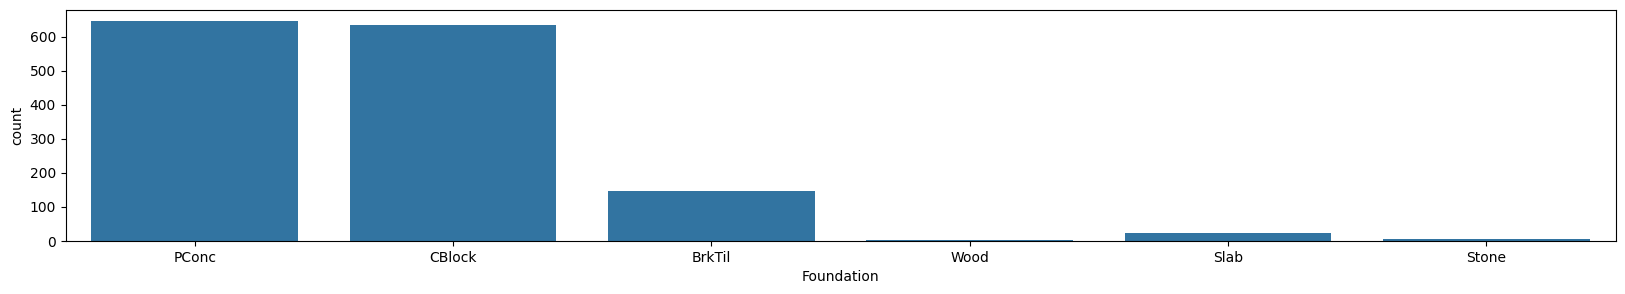

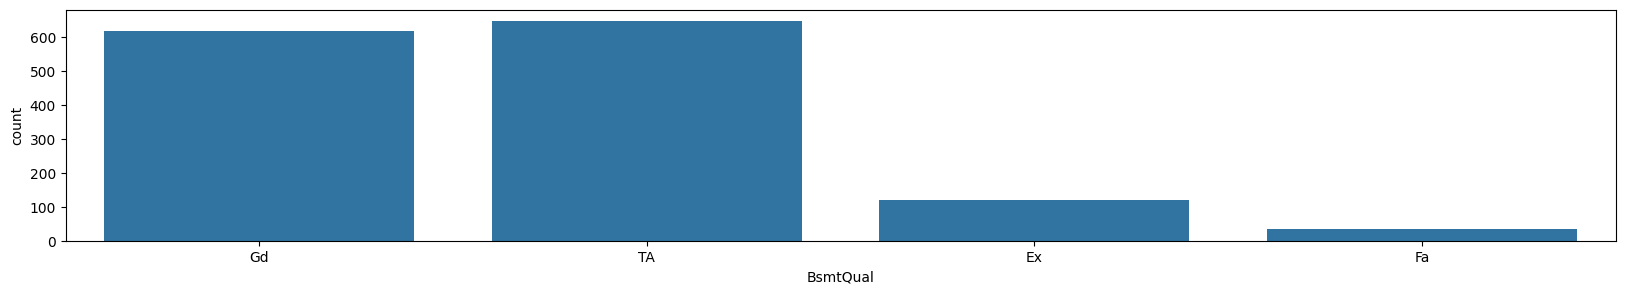

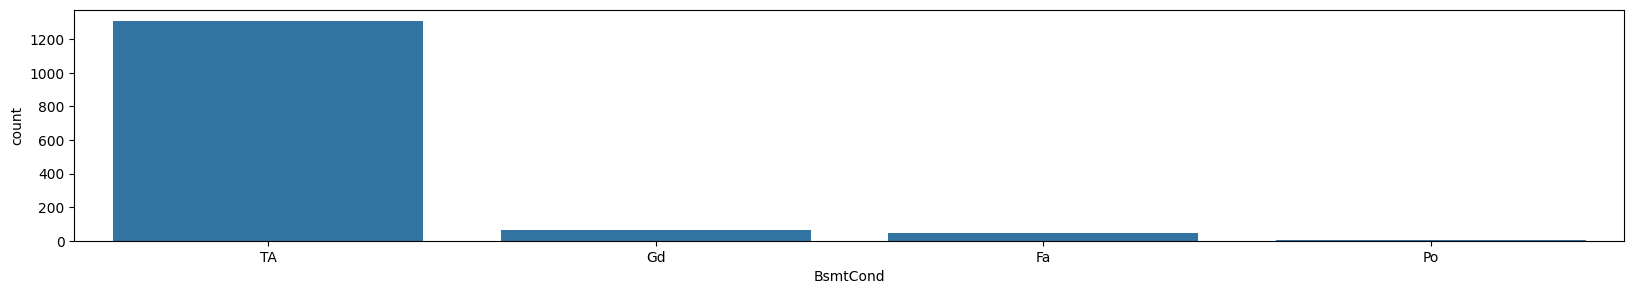

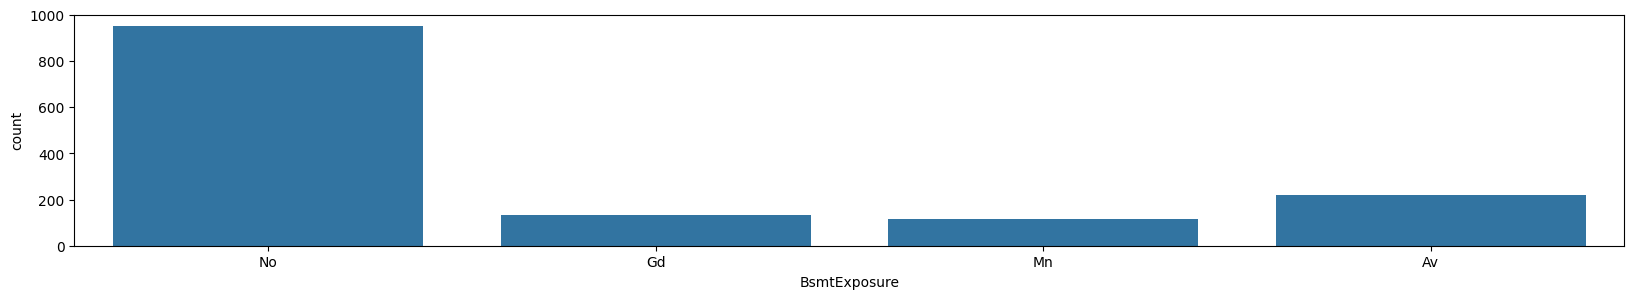

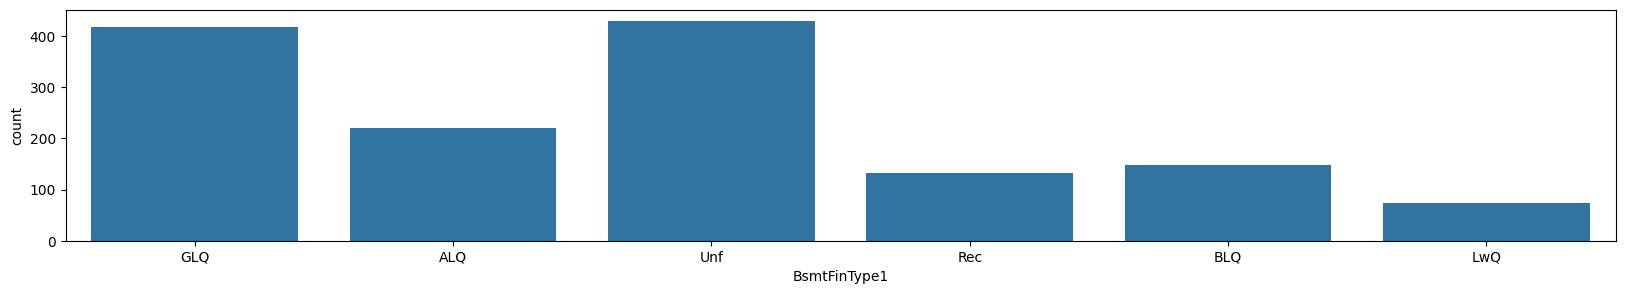

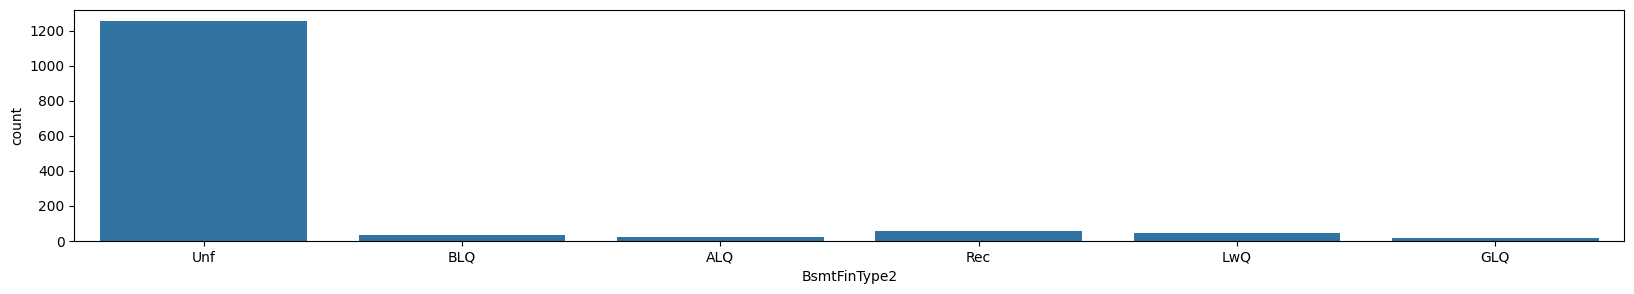

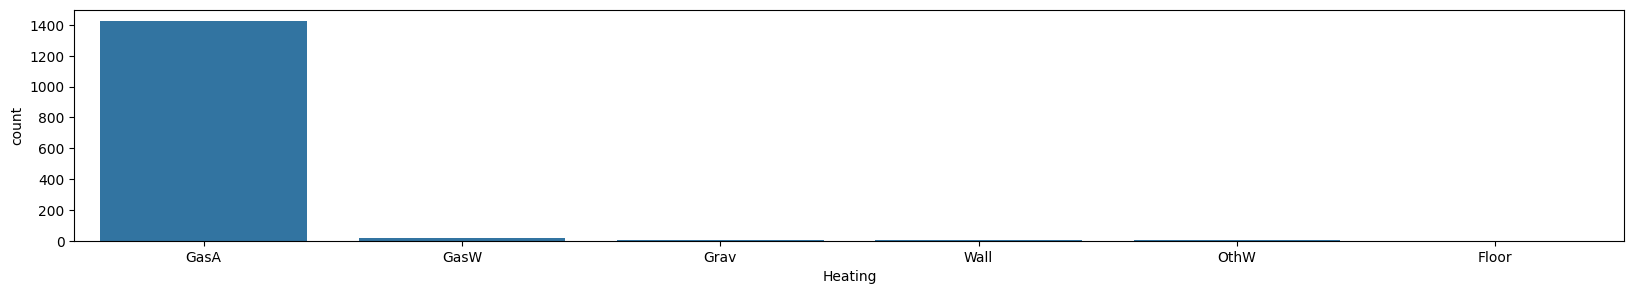

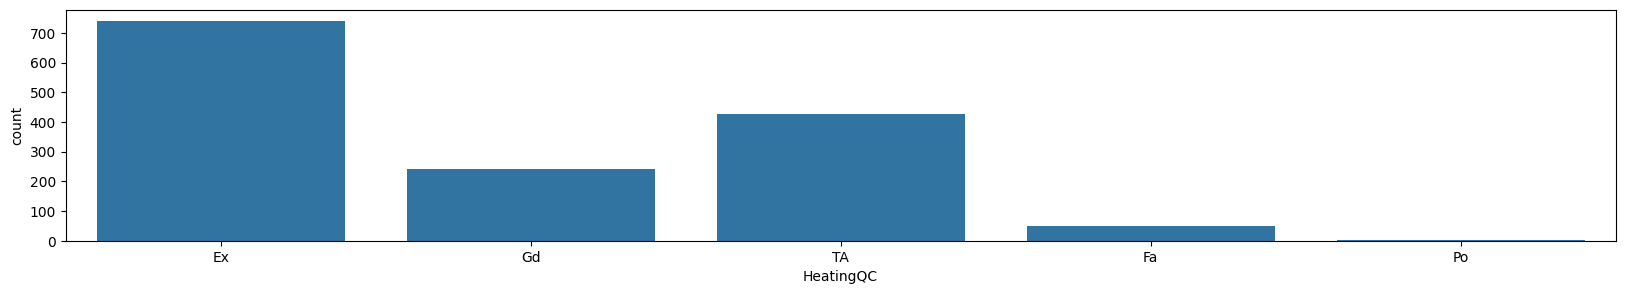

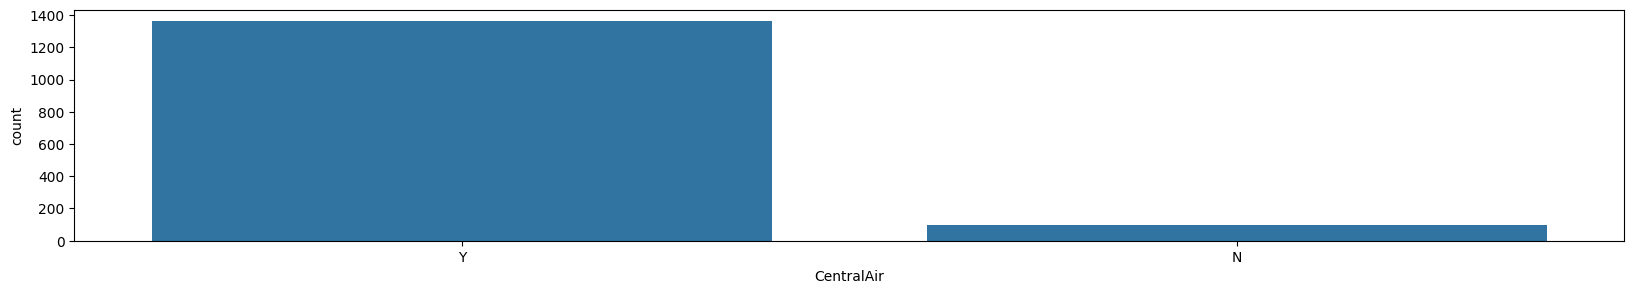

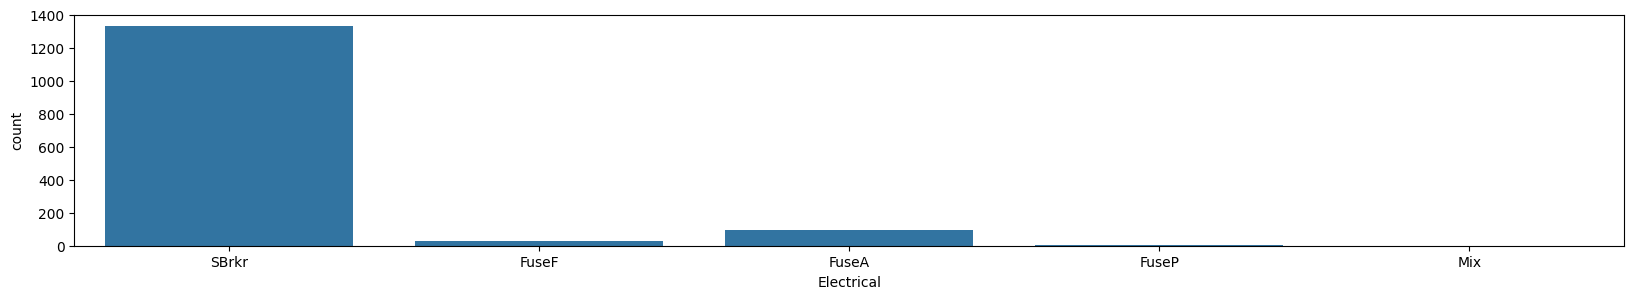

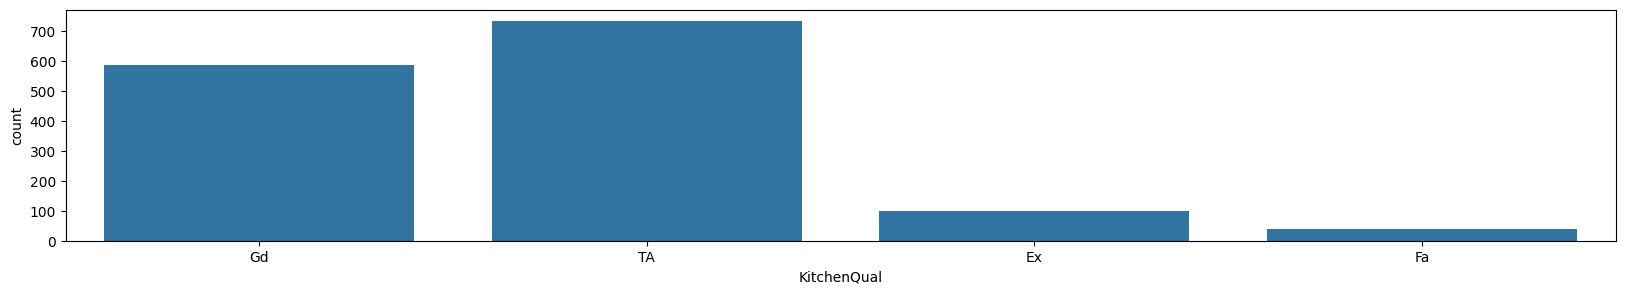

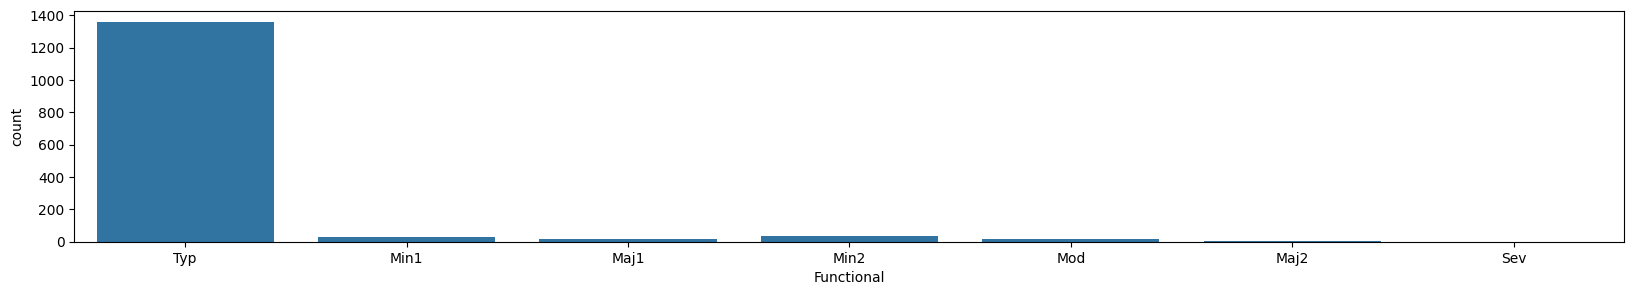

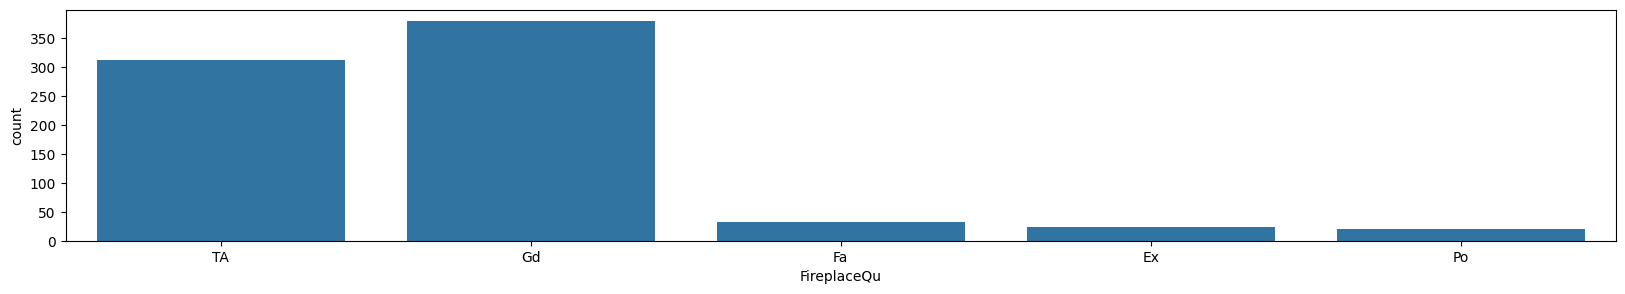

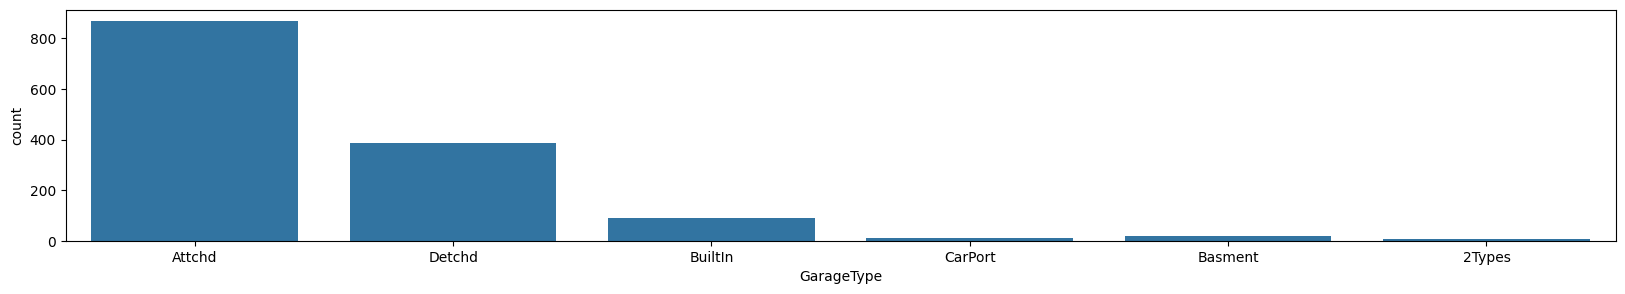

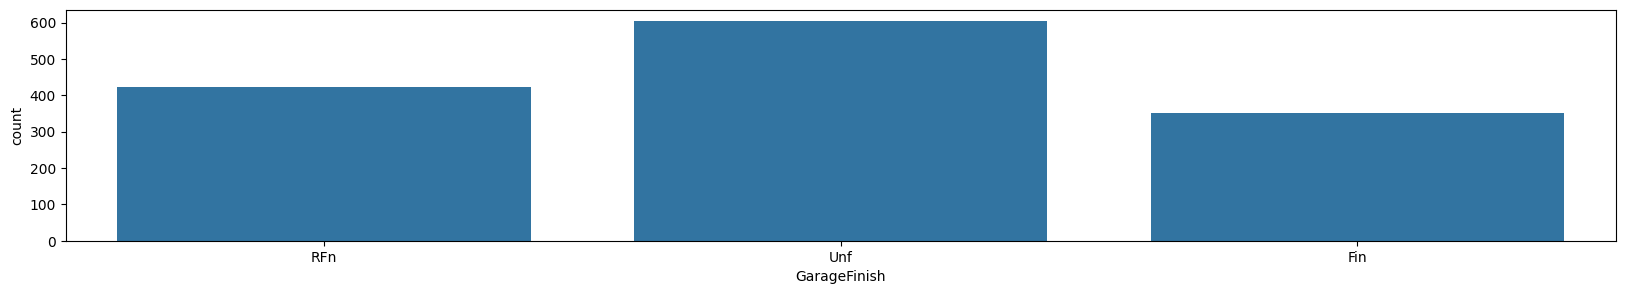

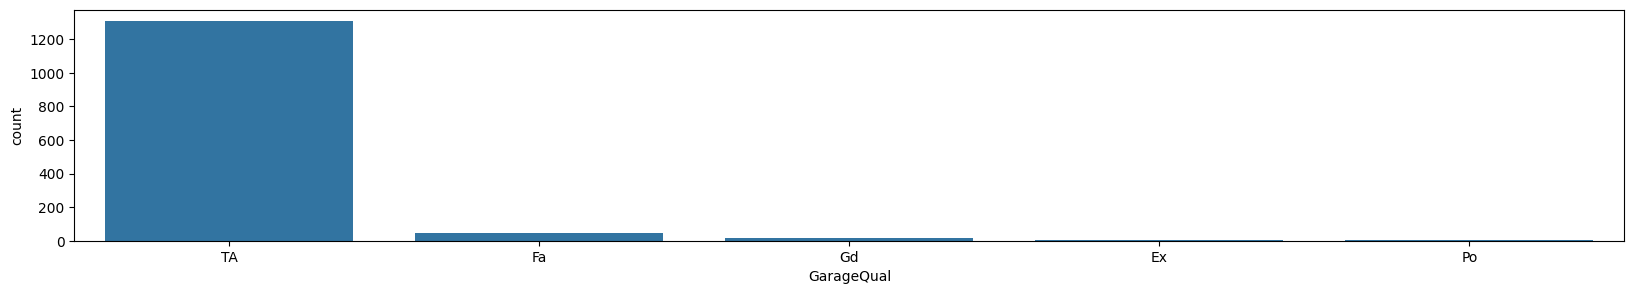

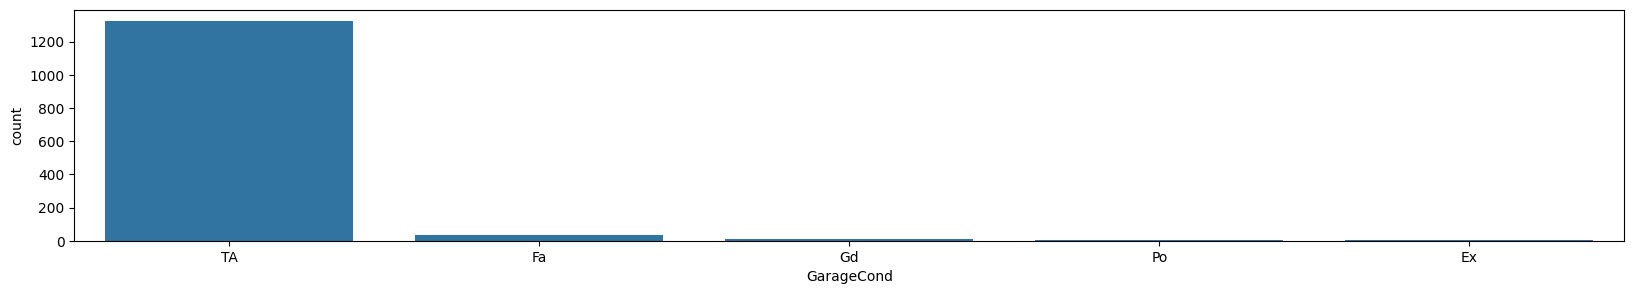

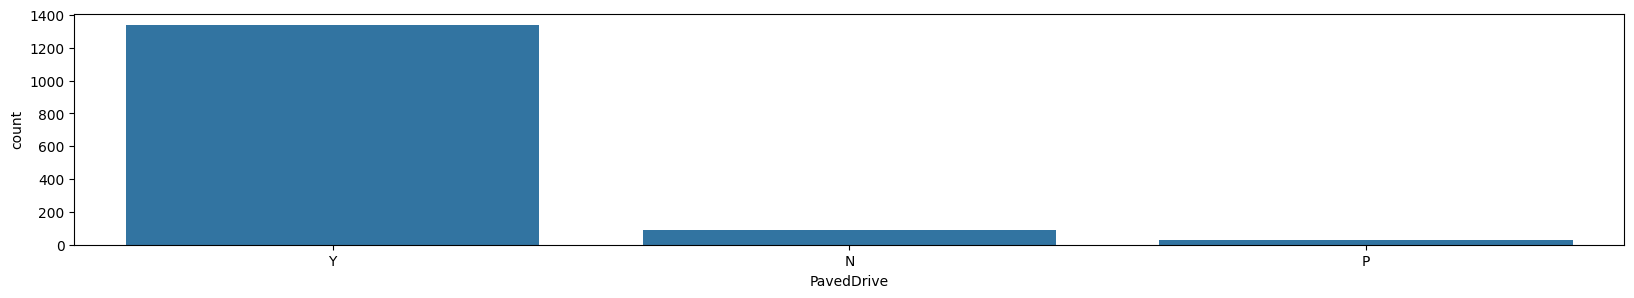

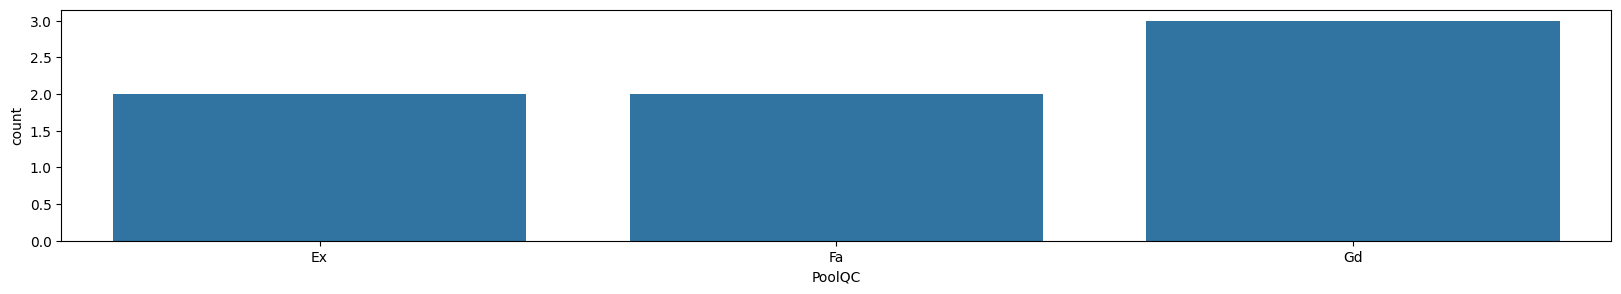

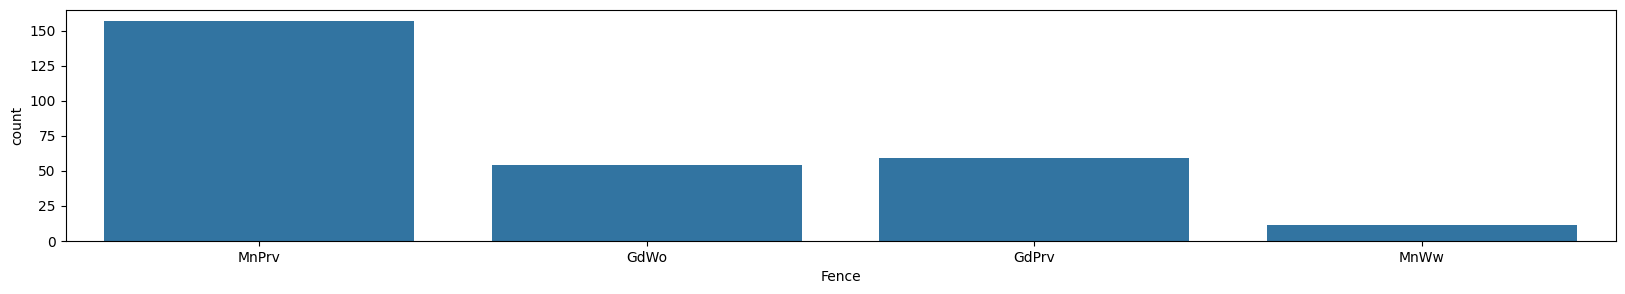

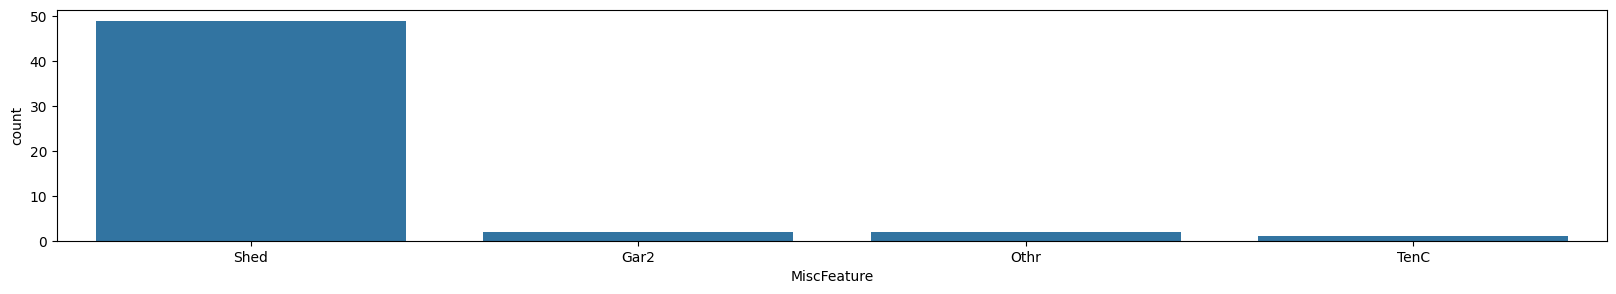

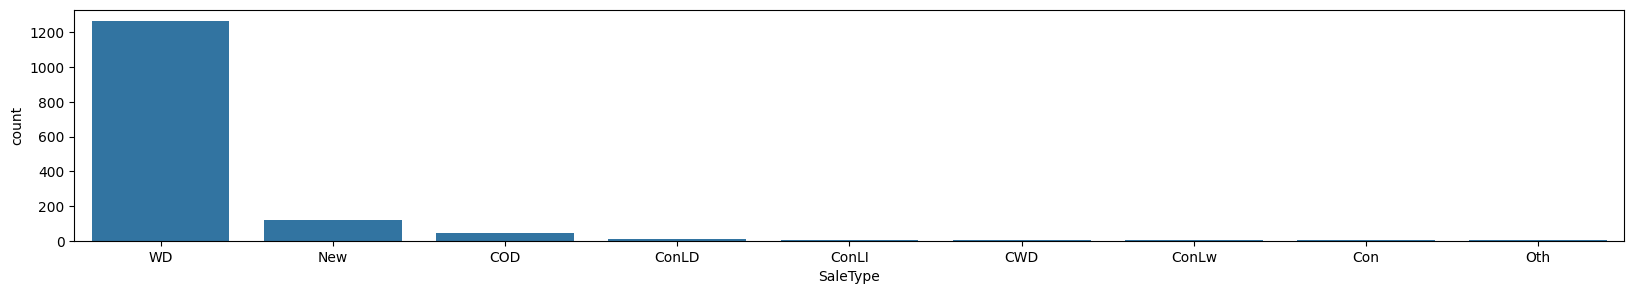

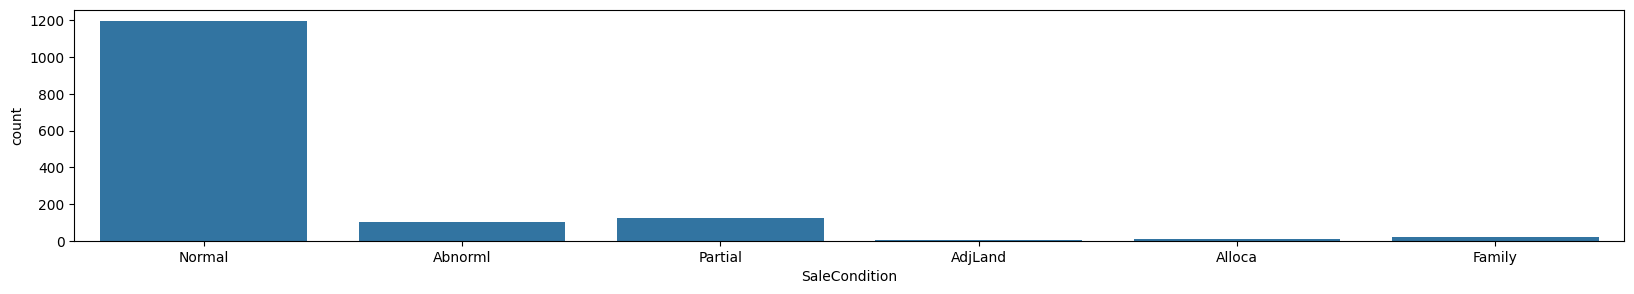

In [91]:
for col in categoricals:
    plt.figure(figsize=(20, 3))
    sns.countplot(x=col, data=data)
    plt.show()

## 결측값 (missing value)

In [92]:
missing = data.isnull().sum()
missing

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<Axes: >

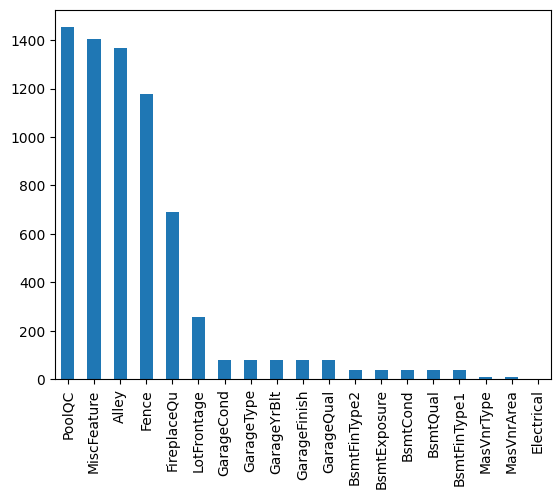

In [93]:
missing[missing > 0].sort_values(ascending=False).plot(kind='bar')

In [94]:
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
missing
# 결측치가 많다고 하더라도 변수 표현을 변경해서 설명력을 높일 수 있다.
# 예를 들어, PoolQC : 수영장이 있다 없다 로 표현
# 또는 중복되는 의미의 변수는 줄여보기

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

<Axes: >

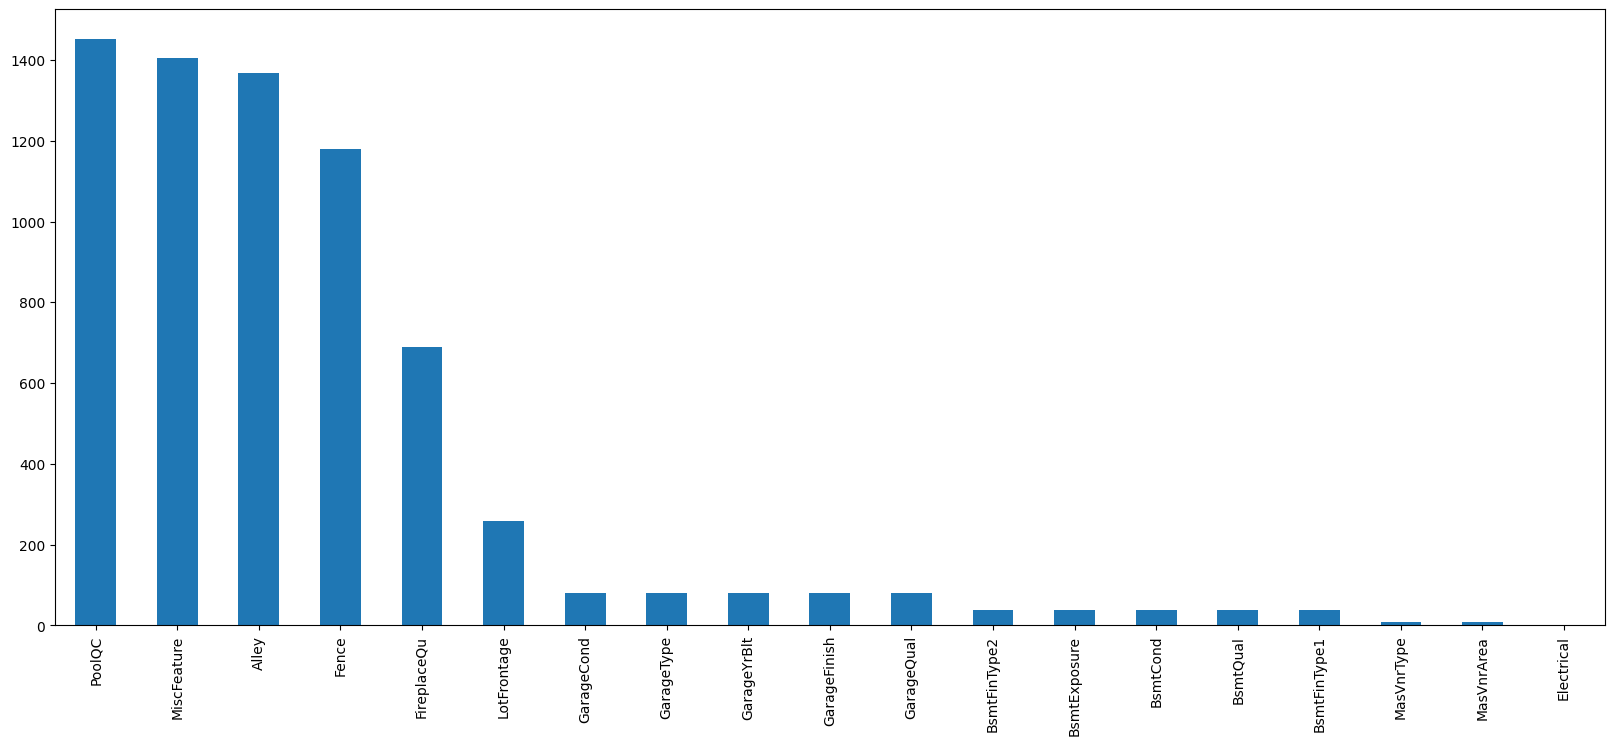

In [95]:
plt.figure(figsize=(20, 8))
missing.plot(kind='bar')

<Axes: >

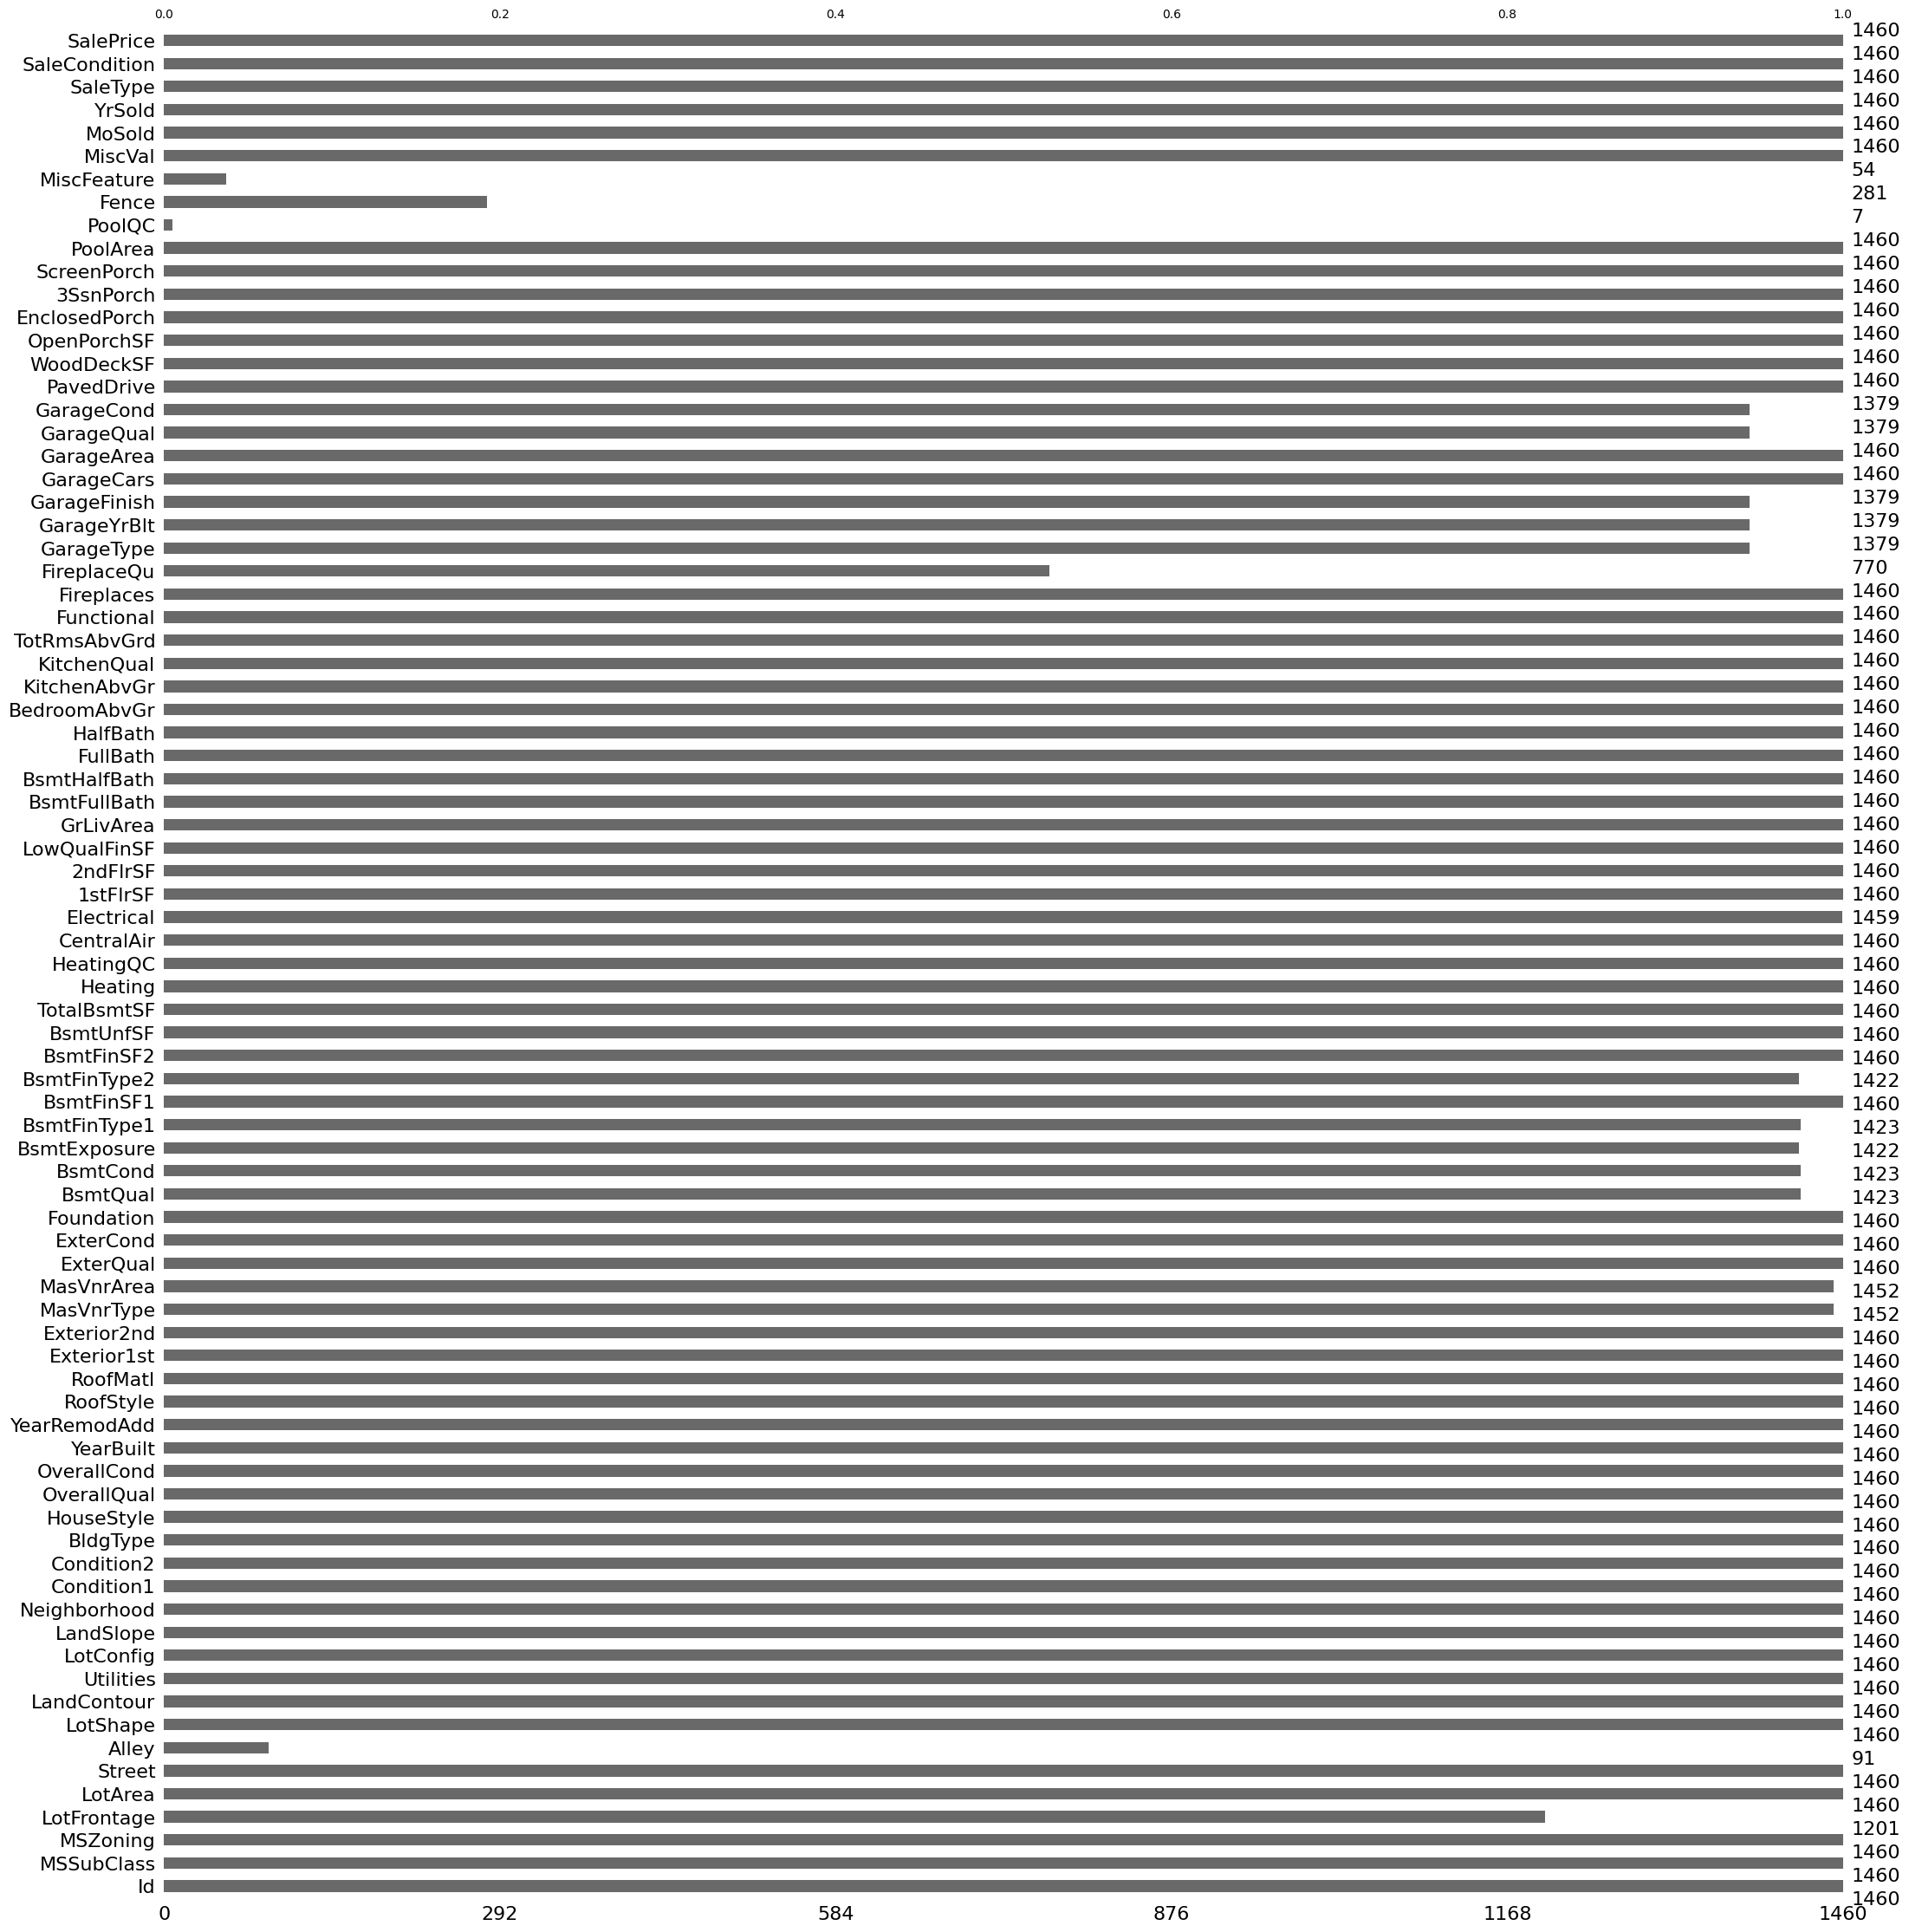

In [96]:
import missingno as msno
msno.bar(data)

<Axes: >

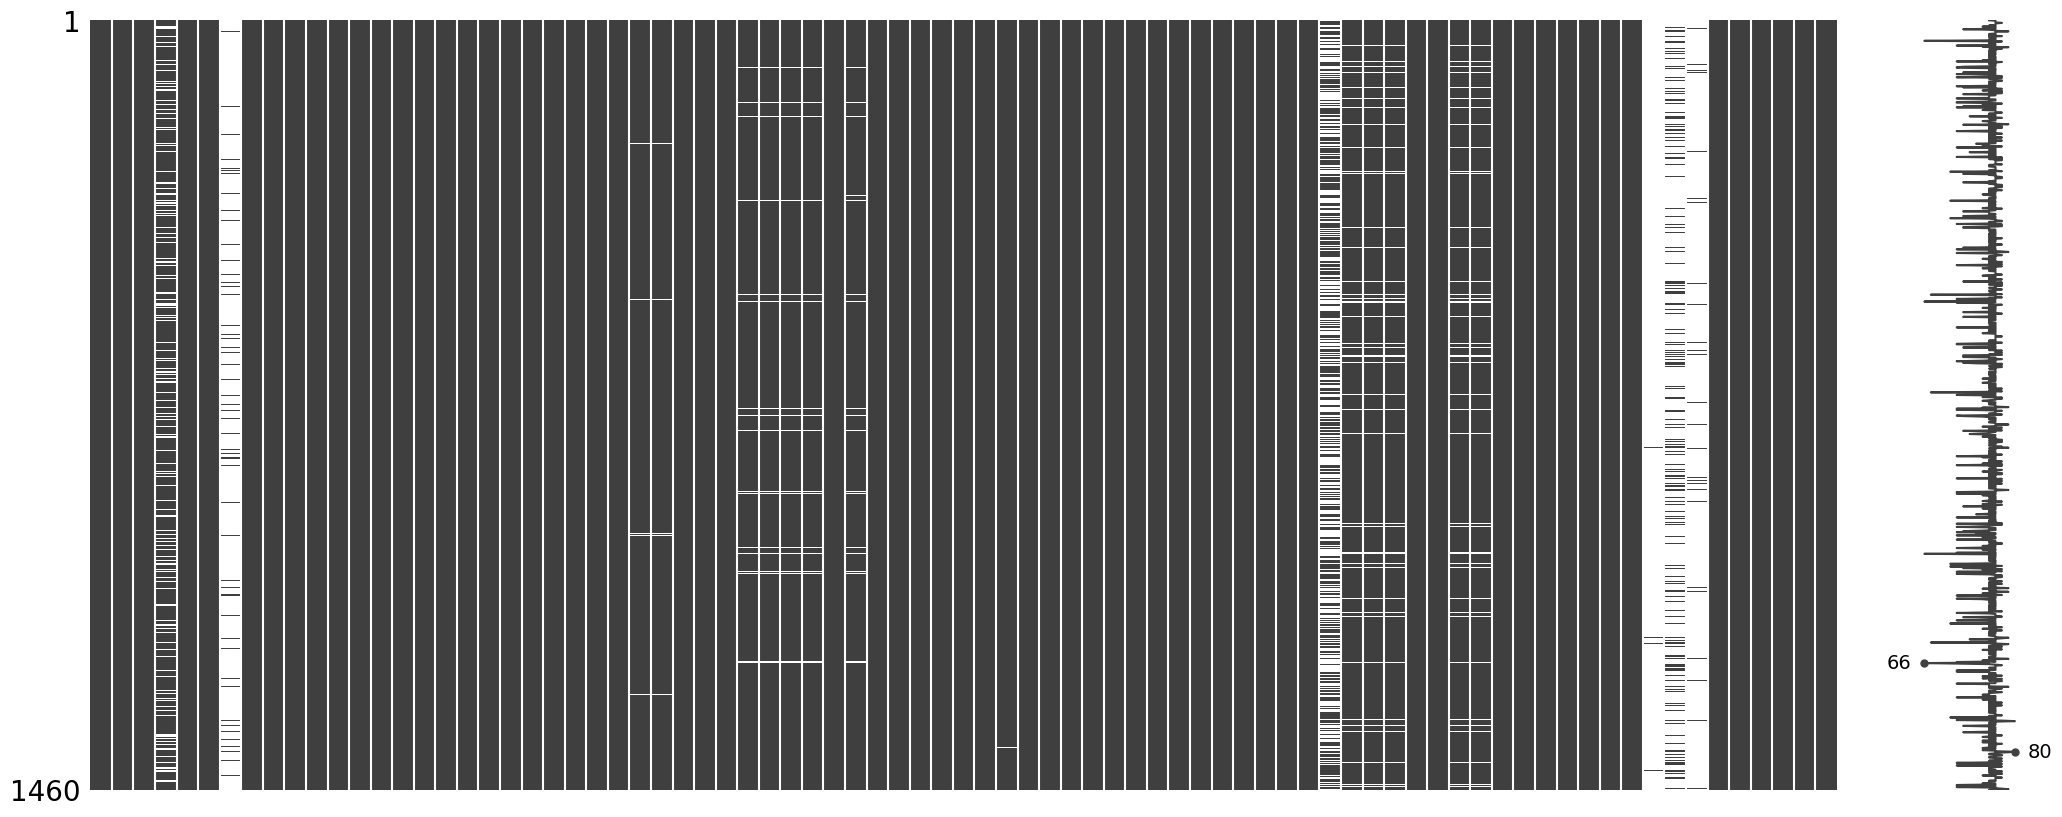

In [97]:
msno.matrix(data)

# 범주 값에 따른 SalePrice 분포

In [98]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg   'Wd Sdng'   'Wd Shng'       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [99]:
categoricals

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [100]:
pd.melt(data, id_vars=['SalePrice'], value_vars=categoricals) # SalePrice 값을 기준으로 데이터프레임을 가로로 펼쳐져있던 것을 세로로 길게 바꿔준다.

SalePrice       variable   value
0         208500       MSZoning      RL
1         181500       MSZoning      RL
2         223500       MSZoning      RL
3         140000       MSZoning      RL
4         250000       MSZoning      RL
...          ...            ...     ...
62775     175000  SaleCondition  Normal
62776     210000  SaleCondition  Normal
62777     266500  SaleCondition  Normal
62778     142125  SaleCondition  Normal
62779     147500  SaleCondition  Normal

[62780 rows x 3 columns]

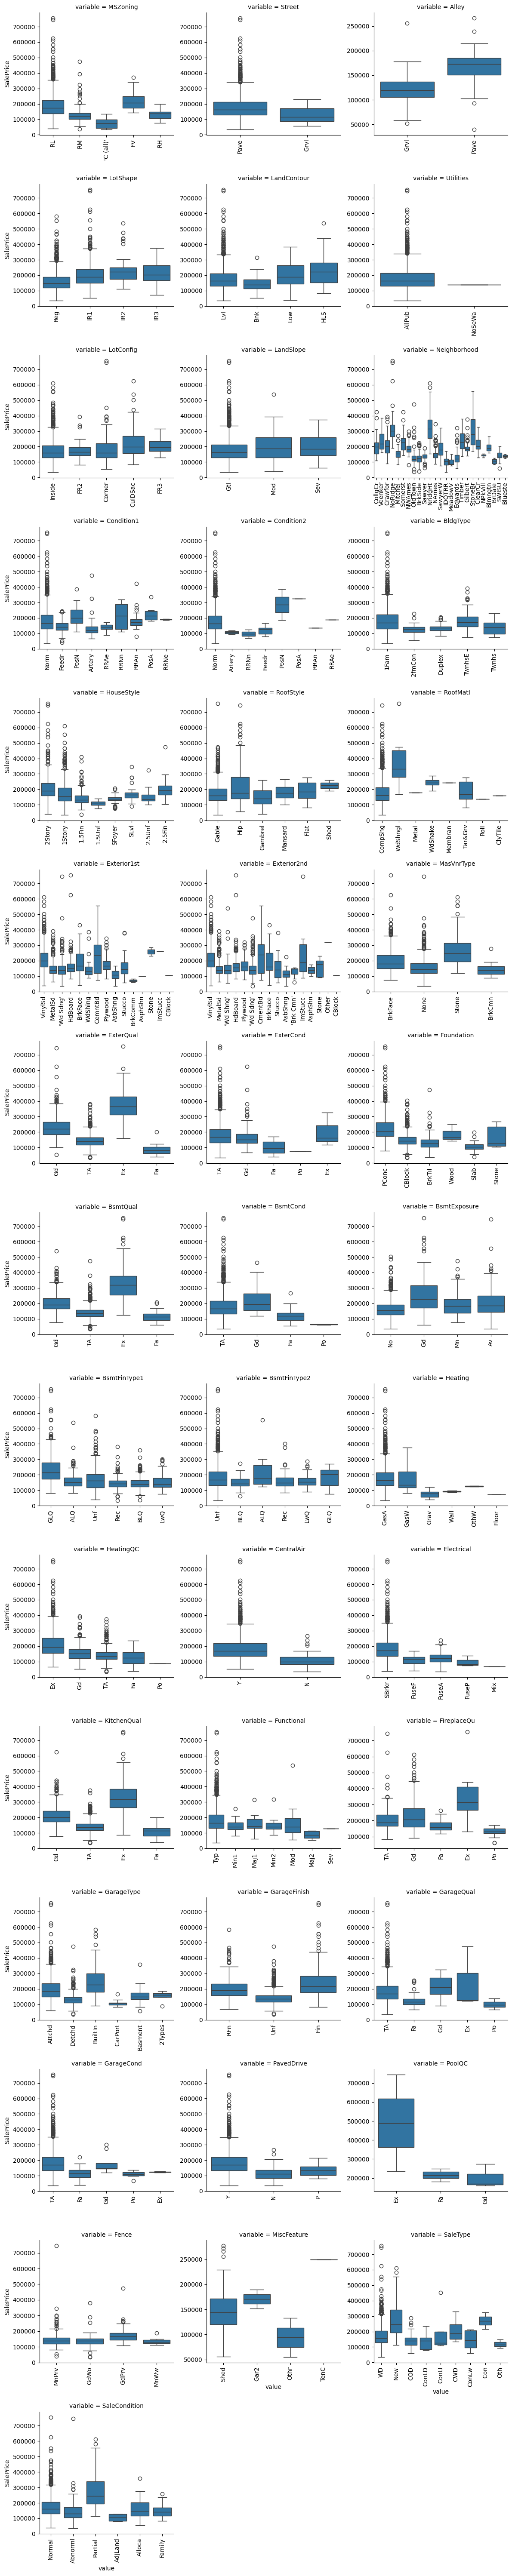

In [101]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(data, id_vars=['SalePrice'], value_vars=categoricals)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(boxplot, "value", "SalePrice")

###  수치형 변수를 구간으로 구분 (범주형 변수로 변환)

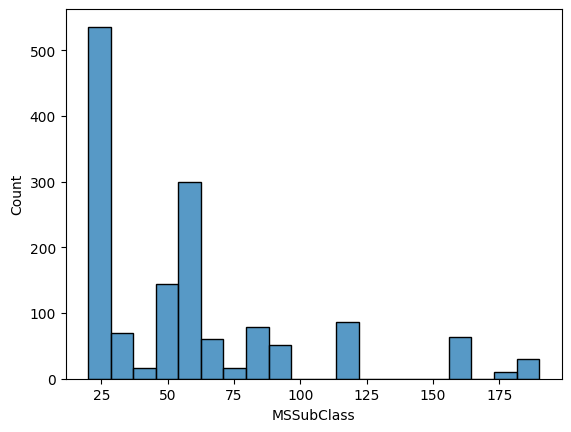

In [102]:
sns.histplot(x='MSSubClass', data=data);

In [103]:
q1, q3 = data['MSSubClass'].quantile([.25, .75])
print(q1, q3)

20.0 70.0


In [104]:
bottom = data['MSSubClass'].min() - (q3 - q1)
top = data['MSSubClass'].max() + (q3 - q1)
print(bottom, top)

-30.0 240.0


In [105]:
bins = [bottom, q1, q3, top]
labels = ['Low', 'Medium', 'High']
pd.cut(data['MSSubClass'], bins=bins, labels=labels)

0       Medium
1          Low
2       Medium
3       Medium
4       Medium
         ...  
1455    Medium
1456       Low
1457    Medium
1458       Low
1459       Low
Name: MSSubClass, Length: 1460, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [106]:
cut_train = data[numerics + ['SalePrice']]
cut_train.head(2)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   

   SalePrice  
0     208500  
1     181500

In [107]:
cut_numerics = []
for col in numerics:
    try:
        q1, q3 = cut_train[col].quantile([.25, .75])
        bottom = cut_train[col].min() - (q3 - q1)
        top = cut_train[col].max() + (q3 - q1)

        bins = [bottom, q1, q3, top]
        labels = ['Low', 'Medium', 'High']
        cut_train[col] = pd.cut(cut_train[col], bins=bins, labels=labels)
        
        cut_numerics.append(col)
    except:
        cut_train = cut_train.drop(col, axis=1)
        print(f'{col} is deleted.')

cut_train.head(2)    

BsmtFinSF2 is deleted.
LowQualFinSF is deleted.
BsmtHalfBath is deleted.
KitchenAbvGr is deleted.
EnclosedPorch is deleted.
3SsnPorch is deleted.
ScreenPorch is deleted.
PoolArea is deleted.
MiscVal is deleted.


MSSubClass LotFrontage LotArea OverallQual OverallCond YearBuilt  \
0     Medium      Medium  Medium      Medium         Low      High   
1        Low      Medium  Medium      Medium        High    Medium   

  YearRemodAdd MasVnrArea BsmtFinSF1 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF  \
0       Medium       High     Medium       Low      Medium      Low     High   
1       Medium        Low       High    Medium      Medium   Medium      Low   

  GrLivArea BsmtFullBath FullBath HalfBath BedroomAbvGr TotRmsAbvGrd  \
0    Medium       Medium   Medium   Medium       Medium         High   
1    Medium          Low   Medium      Low       Medium       Medium   

  Fireplaces GarageYrBlt GarageCars GarageArea WoodDeckSF OpenPorchSF MoSold  \
0        Low        High     Medium     Medium        Low      Medium    Low   
1     Medium      Medium     Medium     Medium       High         Low    Low   

   YrSold  SalePrice  
0  Medium     208500  
1     Low     181500

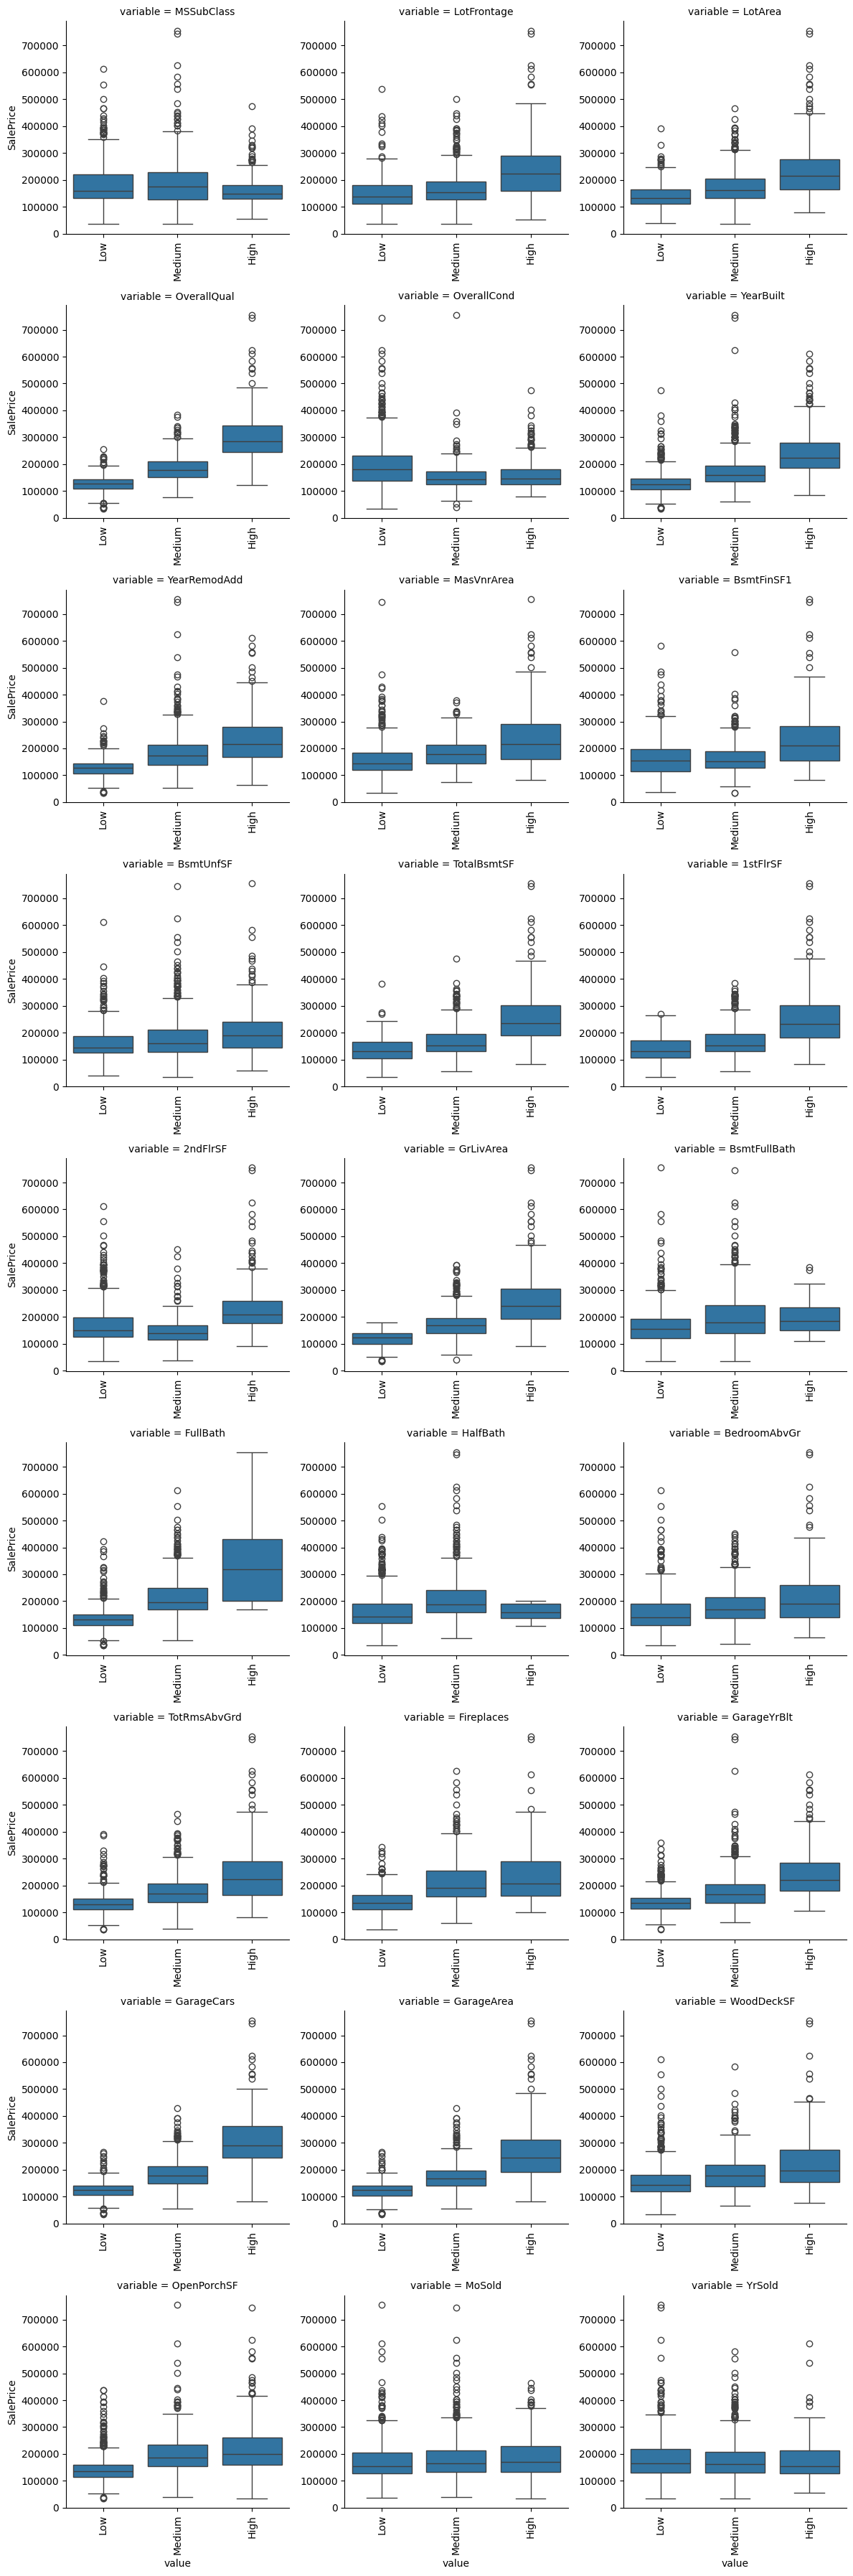

In [108]:
f = pd.melt(cut_train, id_vars=['SalePrice'], value_vars=cut_numerics)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(boxplot, "value", "SalePrice")

## 상관계수 분석

In [109]:
# 상관계수 행렬
data[numerics+['SalePrice']].corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

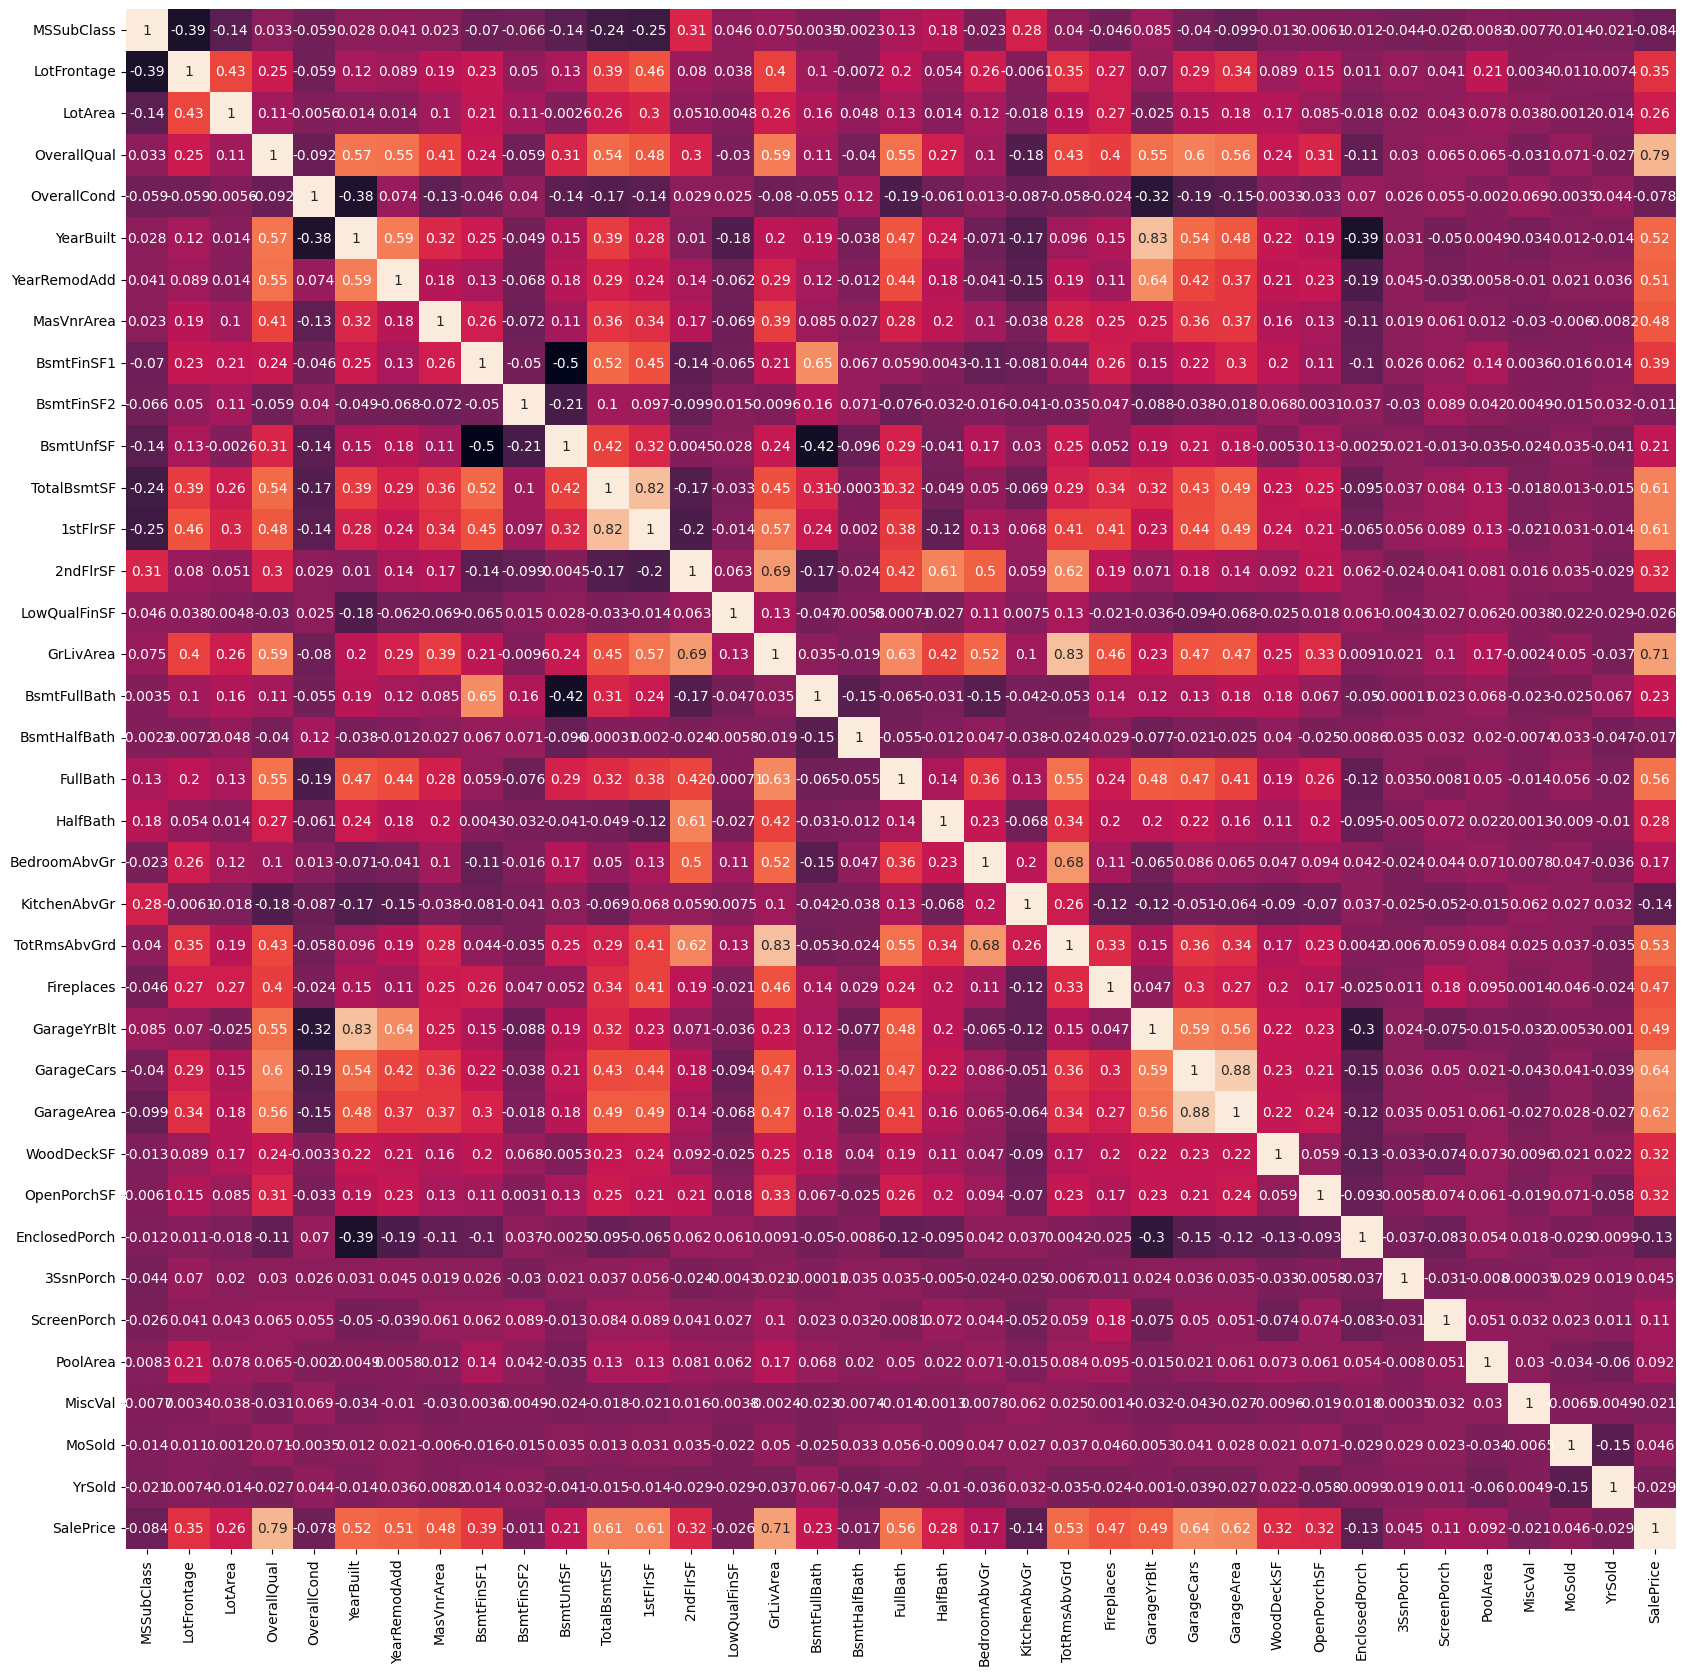

In [110]:
# 히트맵
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(data[numerics+['SalePrice']].corr(), annot=True, cbar=False);
plt.show()

In [111]:
data[numerics+['SalePrice']].corr().loc[:'YrSold', 'SalePrice'].abs().sort_values(ascending=False) # 상관계수 높은 순 정렬

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

# Shap 분석

In [112]:
# shap value - Tree 모델
# !pip install shap

import shap
explainer = shap.TreeExplainer(random_forest) # 모델을 shap value 계산을 위한 TreeExplainer로 변환
shap_values = explainer.shap_values(X_val)    # Shap Values 계산

In [113]:
# graph 초기화
shap.initjs() 

### Shap Force Plot (모델의 예측을 설명)

1. 설명:

- 빨간색 화살표: 예측값을 증가시키는 특성들 (양의 영향)
- 파란색 화살표: 예측값을 감소시키는 특성들 (음의 영향)
- 화살표의 길이: 영향력의 크기
- 중앙의 값: 기본값 (base value)
- 오른쪽 끝의 값: 최종 예측값
- 특성값: 각 화살표 위에 해당 특성의 실제 값이 표시됨

2. 활용:
- 개별 예측에 대한 상세 분석 가능
- 특성들의 상대적 중요도 파악
- 모델의 의사결정 과정 이해
- 예측의 신뢰성 평가

In [114]:
# 모델의 기본 예측값 (전체 데이터셋의 평균 예측값)
explainer.expected_value

array([180514.2938613])

In [115]:
#  각 변수(특성)이 예측에 미치는 영향력
pd.DataFrame(shap_values, columns=X_val.columns)

MSSubClass  LotFrontage  LotArea   OverallQual  OverallCond  YearBuilt  \
0           0.0          0.0      0.0 -34580.693795          0.0        0.0   
1           0.0          0.0      0.0  69273.697625          0.0        0.0   
2           0.0          0.0      0.0 -34502.153598          0.0        0.0   
3           0.0          0.0      0.0  27733.814484          0.0        0.0   
4           0.0          0.0      0.0 -40614.758814          0.0        0.0   
..          ...          ...      ...           ...          ...        ...   
287         0.0          0.0      0.0  28392.118803          0.0        0.0   
288         0.0          0.0      0.0 -38447.687945          0.0        0.0   
289         0.0          0.0      0.0 -34980.694135          0.0        0.0   
290         0.0          0.0      0.0 -33506.475022          0.0        0.0   
291         0.0          0.0      0.0 -33573.765266          0.0        0.0   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0.0         0.0  -23.166876         0.0        0.0    -8.090618   
1             0.0         0.0  -86.985062         0.0        0.0   -62.400050   
2             0.0         0.0   64.536297         0.0        0.0    -8.090618   
3             0.0         0.0  -86.985062         0.0        0.0    -8.090618   
4             0.0         0.0  -23.166876         0.0        0.0    -8.090618   
..            ...         ...         ...         ...        ...          ...   
287           0.0         0.0  -86.985062         0.0        0.0    -8.090618   
288           0.0         0.0   64.536297         0.0        0.0    -8.090618   
289           0.0         0.0  -23.166876         0.0        0.0    -8.090618   
290           0.0         0.0  -23.166876         0.0        0.0    -8.090618   
291           0.0         0.0  -23.166876         0.0        0.0    -8.090618   

      1stFlrSF  2ndFlrSF  LowQualFinSF     GrLivArea  BsmtFullBath  \
0    -9.648625       0.0           0.0  13610.672723           0.0   
1   -68.962279       0.0           0.0   4604.003795           0.0   
2    -9.648625       0.0           0.0  13610.672723           0.0   
3    -9.648625       0.0           0.0   7215.984113           0.0   
4    -9.648625       0.0           0.0  -8494.734658           0.0   
..         ...       ...           ...           ...           ...   
287  -9.648625       0.0           0.0   7587.777163           0.0   
288  -9.648625       0.0           0.0  -6572.229939           0.0   
289  -9.648625       0.0           0.0  13610.672723           0.0   
290  -9.648625       0.0           0.0  -8346.293803           0.0   
291  -9.648625       0.0           0.0  -8648.062036           0.0   

     BsmtHalfBath    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0.0 -825.175630       0.0           0.0           0.0   
1             0.0  377.927915       0.0           0.0           0.0   
2             0.0  949.598008       0.0           0.0           0.0   
3             0.0  888.972666       0.0           0.0           0.0   
4             0.0 -825.175630       0.0           0.0           0.0   
..            ...         ...       ...           ...           ...   
287           0.0  888.972666       0.0           0.0           0.0   
288           0.0 -825.175630       0.0           0.0           0.0   
289           0.0 -825.175630       0.0           0.0           0.0   
290           0.0 -825.175630       0.0           0.0           0.0   
291           0.0 -825.175630       0.0           0.0           0.0   

     TotRmsAbvGrd  Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
0             0.0   91.395938          0.0   166.562416  -574.205128   
1             0.0   34.492710          0.0 -2137.105753  4713.178515   
2             0.0   91.395938          0.0   166.562416  -574.205128   
3             0.0   34.492710          0.0 -1778.651767 -2104.521455   
4             0.0   91.395938

In [116]:
# 첫 번째 샘플의 Shap Value
shap.force_plot(explainer.expected_value, shap_values[0,:], X_val.iloc[0,:])

In [117]:
# Shap Force Plot 출력 (전체 데이터셋)
shap.force_plot(explainer.expected_value, shap_values, X_val) 

### Shap Summary Plot (모델의 전체적인 특성 중요도와 영향을 설명)

1. 주요 해석 포인트:

    1. Y축 (특성):
        - 특성들이 중요도 순으로 정렬됨
        - 상단에 위치할수록 모델의 예측에 더 큰 영향을 미치는 특성

    2. X축 (SHAP value):
        - 각 특성이 예측에 미치는 영향의 크기
        - 음수: 예측값을 감소시키는 영향
        - 양수: 예측값을 증가시키는 영향

    3. 색상 표현:
        - 빨간색: 해당 특성의 높은 값
        - 파란색: 해당 특성의 낮은 값
        - 각 점의 색상은 원래 특성값의 크기를 나타냄

    4. 점들의 분포:
        - 수평 방향으로 퍼져있는 정도: 해당 특성의 영향력 변동성
        - 점들이 더 넓게 퍼져있을수록 상황에 따라 영향력이 크게 달라짐

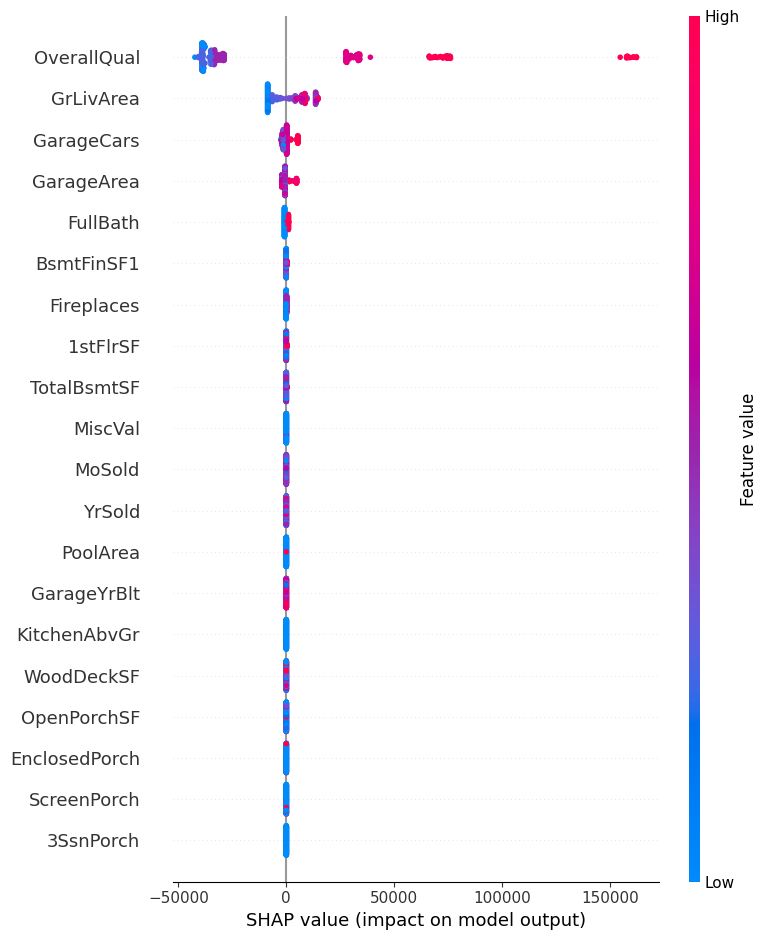

In [118]:
# Shap Summary Plot
shap.summary_plot(shap_values, X_val)

[해석]

- OverallQual 특성: 상단에 위치, 넓은 분포
    - 모델에서 가장 중요한 특성
    - 높은 값(빨간색)일 때 예측값 증가
    - 낮은 값(파란색)일 때 예측값 감소

- GarageArea 특성: 중간에 위치, 좁은 분포
    - 중간 정도의 중요도
    - 일관된 영향력 보임

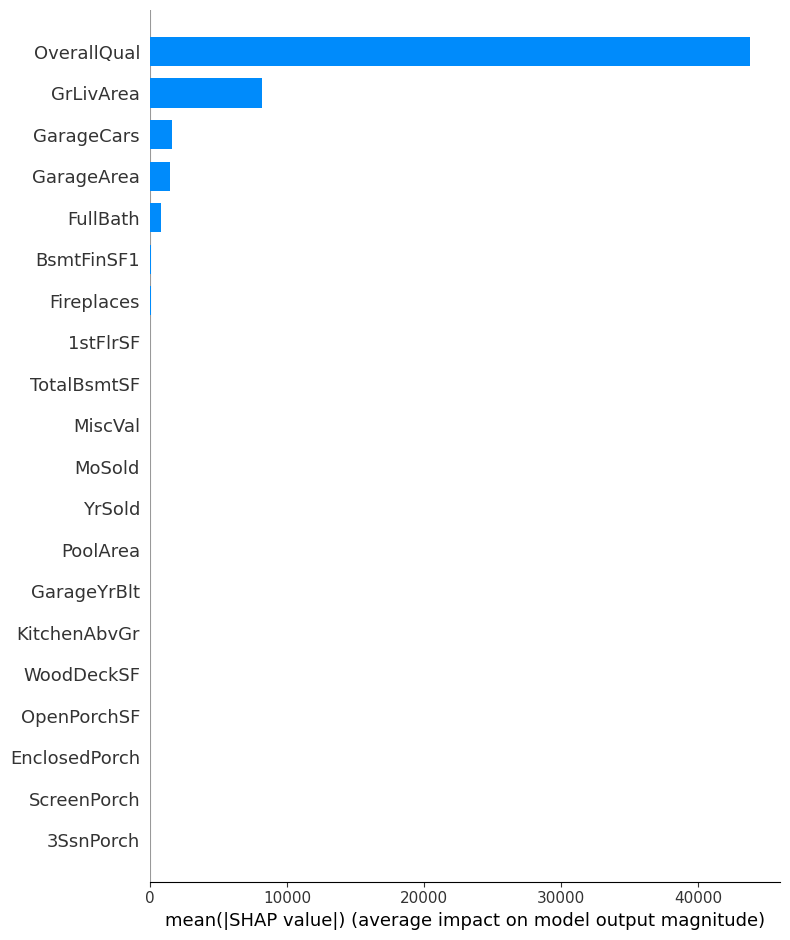

In [119]:
# 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_val, plot_type = "bar")